In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# import os
# from PIL import Image
# import matplotlib.pyplot as plt

# # Path to benign folder
# tb = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign' 

# # List only image files (exclude masks)
# tbi = [f for f in os.listdir(tb) 
#        if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')) and 'mask' not in f.lower()][:16]

# plt.figure(figsize=(30, 20))
# for i, file in enumerate(tbi):
#     img_path = os.path.join(tb, file)
#     img = Image.open(img_path)
#     plt.subplot(4, 4, i + 1)  
#     plt.imshow(img, cmap='gray')
#     plt.title(file, fontsize=20)
#     plt.axis('off')

# plt.tight_layout()
# plt.show()


In [4]:
# tm = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant'

# tmi = [f for f in os.listdir(tm) 
#        if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')) and 'mask' not in f.lower()][:16]

# plt.figure(figsize=(30, 20))
# for i, file in enumerate(tmi):
#     img_path = os.path.join(tm, file)
#     img = Image.open(img_path)
#     plt.subplot(4, 4, i + 1)  
#     plt.imshow(img, cmap='gray')
#     plt.title(file, fontsize=20)
#     plt.axis('off')

# plt.tight_layout()
# plt.show()


In [5]:
import cv2

In [6]:
# from skimage import filters, segmentation, measure, morphology, exposure

# # File paths
# benign_path = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (103).png'
# malignant_path = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant/malignant (154).png'




# # Helper to display results
# def display_results(img, segs, titles):
#     plt.figure(figsize=(20, 5))
#     for i, (seg, title) in enumerate(zip(segs, titles)):
#         plt.subplot(1, len(segs), i + 1)
#         plt.imshow(seg, cmap='gray')
#         plt.title(title)
#         plt.axis('off')
#     plt.tight_layout()
#     plt.show()

# # Load and preprocess images
# def load_and_preprocess(path):
#     img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#     if img is None:
#         raise FileNotFoundError(f"Could not open {path}")
#     if img.dtype != np.uint8:
#         img = (img * 255).astype(np.uint8)
#     return img

# benign_img = load_and_preprocess(benign_path)
# malignant_img = load_and_preprocess(malignant_path)



In [7]:
# def onclick(event):
#     print(f"Seed coordinates: ({int(event.xdata)}, {int(event.ydata)})")

# fig, ax = plt.subplots()
# ax.imshow(malignant_img, cmap='gray')
# plt.title("Click to select seed")
# cid = fig.canvas.mpl_connect('button_press_event', onclick)
# plt.show()

In [8]:
# # ------------------------ PREPROCESSING ------------------------
# def preprocess_for_segmentation(image):
#     # Ensure image is uint8
#     if image.dtype != np.uint8:
#         image = (image * 255).astype(np.uint8)

#     # Step 1: SRAD for speckle reduction (done earlier)
#     # Step 2: Median filter to remove salt-and-pepper noise
#     image = cv2.medianBlur(image, 7)

#     # Step 3: CLAHE to enhance lesion contrast
#     clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#     image = clahe.apply(image)

#     # Step 4: Gaussian blur to smooth small variations
#     image_blur = cv2.GaussianBlur(image, (9, 9), 0)
#     return image_blur


# # ------------------------ OTSU SEGMENTATION ------------------------
# def otsu_segmentation(image):
#     # Histogram equalization before Otsu
#     _, mask = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#     # Morphological cleanup
#     kernel = np.ones((3,3), np.uint8)
#     mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
#     mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
#     return mask


# # ------------------------ ADAPTIVE THRESHOLD ------------------------
# def adaptive_thresholding(image):
#     # Ensure image is uint8
#     if image.dtype != np.uint8:
#         image = (image * 255).astype(np.uint8)

#     # Gaussian adaptive with tuned parameters
#     adaptive = cv2.adaptiveThreshold(
#         image, 255,
#         cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
#         cv2.THRESH_BINARY_INV,  # Invert so dark lesion becomes white
#         blockSize=51,  # larger local region
#         C=10           # stronger bias to suppress bright speckle
#     )

#     # Morphological cleanup
#     kernel = np.ones((3,3), np.uint8)
#     adaptive = cv2.morphologyEx(adaptive, cv2.MORPH_OPEN, kernel)
#     adaptive = cv2.morphologyEx(adaptive, cv2.MORPH_CLOSE, kernel)
#     return adaptive


# # ------------------------ REGION GROWING ------------------------
# def region_growing(image, seed, loDiff=20, upDiff=20):
#     if image.dtype != np.uint8:
#         image = (image * 255).astype(np.uint8)

#     mask = np.zeros((image.shape[0]+2, image.shape[1]+2), np.uint8)
#     flood_val = 255
#     flags = cv2.FLOODFILL_MASK_ONLY | cv2.FLOODFILL_FIXED_RANGE

#     cv2.floodFill(image.copy(), mask, seedPoint=seed, newVal=flood_val,
#                   loDiff=loDiff, upDiff=upDiff, flags=flags)

#     result_mask = mask[1:-1, 1:-1]
#     return result_mask


# # ------------------------ MASK CLEANUP ------------------------
# def clean_mask(mask):
#     kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
#     mask_clean = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
#     mask_clean = cv2.morphologyEx(mask_clean, cv2.MORPH_CLOSE, kernel)
#     return mask_clean

# #----------------canny segmentation----------------
# def canny_segmentation(image):
#     if image.dtype != np.uint8:
#         image = (image * 255).astype(np.uint8)
#     edges = cv2.Canny(image, 50, 150)
#     # Dilate + fill holes
#     kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
#     edges_dilated = cv2.dilate(edges, kernel, iterations=2)
#     filled = cv2.morphologyEx(edges_dilated, cv2.MORPH_CLOSE, kernel, iterations=2)
#     return filled


# #-----------------kmeans_segmentation-------
# def kmeans_segmentation(image, k=2):
#     Z = image.reshape((-1, 1)).astype(np.float32)
#     criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
#     _, labels, centers = cv2.kmeans(Z, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
#     segmented = centers[labels.flatten()]
#     segmented = segmented.reshape(image.shape)
#     segmented = cv2.normalize(segmented, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
#     _, mask = cv2.threshold(segmented, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#     return mask


# #--------------------otsu entropy-based----------------
# from skimage.filters.rank import entropy
# from skimage.morphology import disk

# def entropy_segmentation(image,r=24):
#     entropy_img = entropy(image, disk(r))
#     entropy_img = cv2.normalize(entropy_img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
#     _, mask = cv2.threshold(entropy_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#     return mask

# # ------------------------ Geodesic Active Contour------------------------
# from skimage.segmentation import morphological_geodesic_active_contour, inverse_gaussian_gradient
# from skimage.filters import sobel

# def geodesic_active_contour_segmentation(image, iterations=200):
#     if image.dtype != np.uint8:
#         image = (image * 255).astype(np.uint8)

#     # 1. Compute edge map (inverse gradient for evolution)
#     gimg = inverse_gaussian_gradient(image, alpha=100, sigma=2)

#     # 2. Initialize level set (e.g., central circle)
#     # Use Otsu threshold as initial mask
#     _, init_ls = cv2.threshold(image, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#     init_ls = init_ls.astype(np.int8)
 
#     # 3. Evolve contour
#     ls = morphological_geodesic_active_contour(
#     gimg,
#     num_iter=iterations,       # ✅ correct keyword
#     init_level_set=init_ls,
#     smoothing=2,
#     balloon=1,
#     threshold=0.3
#     )


#     return (ls).astype(np.uint8)






# # ------------------------ SRAD FILTER ------------------------
# def SRAD(img, num_iter=150):
#     img = cv2.medianBlur(img, 3)
#     I = img.astype(np.float32) / 255.0
#     mean_I = np.mean(I)
#     var_I = np.var(I)
#     q0_squared = var_I / (mean_I**2 + 1e-10)

#     for i in range(num_iter):
#         nablaN = np.roll(I, -1, axis=0) - I
#         nablaS = np.roll(I, 1, axis=0) - I
#         nablaE = np.roll(I, -1, axis=1) - I
#         nablaW = np.roll(I, 1, axis=1) - I

#         G2 = (nablaN**2 + nablaS**2 + nablaE**2 + nablaW**2) / (I**2 + 1e-10)
#         L = (nablaN + nablaS + nablaE + nablaW) / (I + 1e-10)
#         num = (0.5 * G2) - ((1.0 / 16.0) * (L**2))
#         den = (1.0 + (0.25 * L))
#         q_squared = num / (den**2 + 1e-10)

#         c = np.exp(-((q_squared - q0_squared)**2) / (q0_squared**2 + 1e-10))
#         c = np.clip(c, 0, 1)

#         I = I + 0.25 * (c * (nablaN + nablaS + nablaE + nablaW))

#     I = np.clip(I * 255, 0, 255).astype(np.uint8)
#     I = cv2.bilateralFilter(I, d=5, sigmaColor=25, sigmaSpace=25)
#     return I

In [9]:
# print(benign_img.shape, benign_img.dtype)

In [10]:
# # ------------------------ PIPELINE EXECUTION ------------------------
# srad_img = SRAD(benign_img)
# preprocessed_img = preprocess_for_segmentation(srad_img)

# # Otsu Threshold
# benign_otsu = otsu_segmentation(srad_img)

# benign_kmeans= kmeans_segmentation(srad_img)

# benign_entropy = entropy_segmentation(preprocessed_img)
# benign_g = geodesic_active_contour_segmentation(srad_img)

# # Region Growing
# benign_seed = (150, 250)  # (x, y)
# benign_region = region_growing(preprocessed_img, benign_seed, loDiff=60, upDiff=60)
# benign_region_clean = clean_mask(benign_region)

# benign_otsu_neg = cv2.bitwise_not(benign_otsu)
# benign_kmeans_neg = cv2.bitwise_not(benign_kmeans)
# benign_entropy_neg = cv2.bitwise_not(benign_entropy)
# benign_g_neg= cv2.bitwise_not(benign_g)


# # ------------------------ DISPLAY ------------------------
# plt.figure(figsize=(30,5))

# plt.subplot(1,6,1)
# plt.imshow(preprocessed_img, cmap='gray')
# plt.title('Original')
# plt.axis('off')

# plt.subplot(1,6,2)
# plt.imshow(benign_otsu_neg, cmap='gray')
# plt.title('Otsu Threshold')
# plt.axis('off')

# plt.subplot(1,6,3)
# plt.imshow(benign_kmeans_neg, cmap='gray')
# plt.title('K-Means (k=2)')
# plt.axis('off')

# plt.subplot(1,6,4)
# plt.imshow(benign_entropy_neg, cmap='gray')
# plt.title('Entropy (Otsu on Entropy Map)')
# plt.axis('off')

# plt.subplot(1,6,5)
# plt.imshow(benign_region_clean, cmap='gray')
# plt.title('Region Growing')
# plt.axis('off')

# plt.subplot(1,6,6)
# plt.imshow(benign_g_neg, cmap='gray')
# plt.title('Geodesic Active Contour')
# plt.axis('off')

# plt.tight_layout()
# plt.show()




In [11]:
# print('Seed Value:', preprocessed_img[benign_seed[1], benign_seed[0]])


In [12]:
# actual_mask = cv2.imread('/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (103)_mask.png', cv2.IMREAD_GRAYSCALE)

In [13]:
# plt.figure(figsize=(5,5))
# plt.imshow(actual_mask, cmap='gray')
# plt.title('Actual Mask: Benign(103)')
# plt.axis('off')
# plt.show()

In [14]:
# def dice_coefficient(pred, gt):
#     if pred.shape != gt.shape:
#         pred = pred.astype(np.uint8) * 255
#         pred = cv2.resize(pred, (gt.shape[1], gt.shape[0]), interpolation=cv2.INTER_NEAREST)
#         pred = pred > 0
#     intersection = np.logical_and(pred, gt).sum()
#     return 2. * intersection / (pred.sum() + gt.sum())


# def jaccard_index(pred, gt):
#     if pred.shape != gt.shape:
#         pred = pred.astype(np.uint8) * 255
#         pred = cv2.resize(pred, (gt.shape[1], gt.shape[0]), interpolation=cv2.INTER_NEAREST)
#         pred = pred > 0
#     intersection = np.logical_and(pred, gt).sum()
#     union = np.logical_or(pred, gt).sum()
#     return intersection / union

# def precision(pred, gt):
#     if pred.shape != gt.shape:
#         pred = pred.astype(np.uint8) * 255
#         pred = cv2.resize(pred, (gt.shape[1], gt.shape[0]), interpolation=cv2.INTER_NEAREST)
#         pred = pred > 0
#     tp = np.logical_and(pred, gt).sum()
#     fp = np.logical_and(pred, np.logical_not(gt)).sum()
#     return tp / (tp + fp)

# def recall(pred, gt):
#     if pred.shape != gt.shape:
#         pred = pred.astype(np.uint8) * 255
#         pred = cv2.resize(pred, (gt.shape[1], gt.shape[0]), interpolation=cv2.INTER_NEAREST)
#         pred = pred > 0
#     tp = np.logical_and(pred, gt).sum()
#     fn = np.logical_and(np.logical_not(pred), gt).sum()
#     return tp / (tp + fn)

# def accuracy(pred, gt):
#     if pred.shape != gt.shape:
#         pred = pred.astype(np.uint8) * 255
#         pred = cv2.resize(pred, (gt.shape[1], gt.shape[0]), interpolation=cv2.INTER_NEAREST)
#         pred = pred > 0
#     return (pred == gt).sum() / gt.size


# gt = actual_mask > 0
# otsu = benign_otsu_neg > 0
# kmeans = benign_kmeans_neg > 0
# entropy_arr = benign_entropy_neg > 0
# region = benign_region_clean > 0
# g_mask = benign_g_neg > 0

# methods = {
#     'Otsu': otsu,
#     'KMeans': kmeans,
#     'Entropy Segmentation': entropy_arr,
#     'Region Growing': region,
#     'Geodesic Active Contour': g_mask
# }

# for name, mask_pred in methods.items():
#     print(f"{name} Metrics:")
#     print(f"  Dice:     {dice_coefficient(mask_pred, gt):.4f}")
#     print(f"  Jaccard:  {jaccard_index(mask_pred, gt):.4f}")
#     print(f"  Precision:{precision(mask_pred, gt):.4f}")
#     print(f"  Recall:   {recall(mask_pred, gt):.4f}")
#     print(f"  Accuracy: {accuracy(mask_pred, gt):.4f}\n")

In [15]:
# # ------------------------ PIPELINE EXECUTION(for mailgnant, ignore variable name i copy pasted) ------------------------
# def load_and_preprocess(path):
#     img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#     if img is None:
#         raise FileNotFoundError(f"Could not open {path}")
#     if img.dtype != np.uint8:
#         img = (img * 255).astype(np.uint8)
#     return img

# malignant_img = load_and_preprocess(malignant_path)
# srad_img = SRAD(malignant_img)
# preprocessed_img = preprocess_for_segmentation(srad_img)

# # Otsu Threshold
# benign_otsu = otsu_segmentation(srad_img)

# benign_kmeans= kmeans_segmentation(srad_img)


# benign_entropy = entropy_segmentation(srad_img,10)
# #benign_g = geodesic_active_contour_segmentation(malignant_img)
# # Region Growing
# benign_seed = (270, 200)  # (x, y)
# benign_region = region_growing(preprocessed_img, benign_seed, loDiff=60, upDiff=60)
# benign_region_clean = clean_mask(benign_region)

# #benign_g_neg= cv2.bitwise_not(benign_g)


# # ------------------------ DISPLAY ------------------------
# plt.figure(figsize=(30,5))

# plt.subplot(1,6,1)
# plt.imshow(preprocessed_img, cmap='gray')
# plt.title('Original')
# plt.axis('off')

# plt.subplot(1,6,2)
# plt.imshow(benign_otsu_neg, cmap='gray')
# plt.title('Otsu Threshold')
# plt.axis('off')

# plt.subplot(1,6,3)
# plt.imshow(benign_kmeans_neg, cmap='gray')
# plt.title('K-Means (k=2)')
# plt.axis('off')

# plt.subplot(1,6,4)
# plt.imshow(benign_entropy_neg, cmap='gray')
# plt.title('Entropy (Otsu on Entropy Map)')
# plt.axis('off')

# plt.subplot(1,6,5)
# plt.imshow(benign_region_clean, cmap='gray')
# plt.title('Region Growing')
# plt.axis('off')

# #plt.subplot(1,6,6)
# #plt.imshow(benign_g_neg, cmap='gray')
# #plt.title('Geodesic Active Contour')
# #plt.axis('off')

# plt.tight_layout()
# plt.show()



In [16]:
# actual_mask2 = cv2.imread('/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant/malignant (154)_mask.png', cv2.IMREAD_GRAYSCALE)

In [17]:
# plt.figure(figsize=(5,5))
# plt.imshow(actual_mask2, cmap='gray')
# plt.title('Actual Mask: Benign(98)')
# plt.axis('off')
# plt.show()

In [18]:
# gt = actual_mask2 > 0
# otsu = benign_otsu_neg > 0
# kmeans = benign_kmeans_neg > 0
# entropy_arr = benign_entropy_neg > 0
# region = benign_region_clean > 0
# g_mask = benign_g_neg > 0

# methods = {
#     'Otsu': otsu,
#     'KMeans': kmeans,
#     'Entropy Segmentation': entropy_arr,
#     'Region Growing': region,
#     'Geodesic Active Contour': g_mask
# }

# for name, mask_pred in methods.items():
#     print(f"{name} Metrics:")
#     print(f"  Dice:     {dice_coefficient(mask_pred, gt):.4f}")
#     print(f"  Jaccard:  {jaccard_index(mask_pred, gt):.4f}")
#     print(f"  Precision:{precision(mask_pred, gt):.4f}")
#     print(f"  Recall:   {recall(mask_pred, gt):.4f}")
#     print(f"  Accuracy: {accuracy(mask_pred, gt):.4f}\n")

SAM

In [8]:
import os, csv
from glob import glob
import pandas as pd
import numpy as np

# Path to Kaggle dataset
ROOT = "/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT"
OUT_CSV = "/kaggle/working/index.csv"

# Class folders & numeric labels
CLASS2ID = {"benign": 0, "malignant": 1}
VALID_EXTS = [".png", ".jpg", ".jpeg"]

def has_valid_ext(path):
    return os.path.splitext(path)[1].lower() in VALID_EXTS

def mask_candidate_paths(img_path):
    folder, fname = os.path.split(img_path)
    base, ext = os.path.splitext(fname)
    candidates = []
    for suf in ["_mask", "-mask", ".mask"]:
        for e in VALID_EXTS:
            candidates.append(os.path.join(folder, base + suf + e))
    return candidates

def collect_pairs(class_folder):
    rows = []
    files = [p for p in glob(os.path.join(class_folder, "*")) if os.path.isfile(p)]
    images = [p for p in files if has_valid_ext(p) and "_mask" not in p and "-mask" not in p and ".mask" not in p]
    missing = 0
    for img in sorted(images):
        mask = None
        for cand in mask_candidate_paths(img):
            if os.path.exists(cand):
                mask = cand
                break
        if mask is None:
            missing += 1
            continue
        rows.append((img, mask))
    if missing:
        print(f"[WARN] {missing} image(s) in {class_folder} had no mask.")
    return rows

# --- build table ---
all_rows = []
for cls_name, cls_id in CLASS2ID.items():
    class_dir = os.path.join(ROOT, cls_name)
    pairs = collect_pairs(class_dir)
    for img, msk in pairs:
        all_rows.append((img, msk, cls_name, cls_id))
    print(f"[OK] {cls_name}: {len(pairs)} pairs found")

# --- shuffle ---
df = pd.DataFrame(all_rows, columns=["image", "mask", "label_name", "label_id"])
df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)

# --- save ---
df.to_csv(OUT_CSV, index=False)
print(f"\n✅ Created shuffled table: {OUT_CSV}")
print(f"Total pairs: {len(df)}")
print("\nPreview:")
print(df.head())


[OK] benign: 437 pairs found
[OK] malignant: 210 pairs found

✅ Created shuffled table: /kaggle/working/index.csv
Total pairs: 647

Preview:
                                               image  \
0  /kaggle/input/breast-ultrasound-images-dataset...   
1  /kaggle/input/breast-ultrasound-images-dataset...   
2  /kaggle/input/breast-ultrasound-images-dataset...   
3  /kaggle/input/breast-ultrasound-images-dataset...   
4  /kaggle/input/breast-ultrasound-images-dataset...   

                                                mask label_name  label_id  
0  /kaggle/input/breast-ultrasound-images-dataset...  malignant         1  
1  /kaggle/input/breast-ultrasound-images-dataset...     benign         0  
2  /kaggle/input/breast-ultrasound-images-dataset...     benign         0  
3  /kaggle/input/breast-ultrasound-images-dataset...     benign         0  
4  /kaggle/input/breast-ultrasound-images-dataset...     benign         0  


In [9]:
import pandas as pd
df = pd.read_csv("/kaggle/working/index.csv")
df.tail()


,image,mask,label_name,label_id
642,/kaggle/input/breast-ultrasound-images-dataset...,/kaggle/input/breast-ultrasound-images-dataset...,benign,0
643,/kaggle/input/breast-ultrasound-images-dataset...,/kaggle/input/breast-ultrasound-images-dataset...,benign,0
644,/kaggle/input/breast-ultrasound-images-dataset...,/kaggle/input/breast-ultrasound-images-dataset...,benign,0
645,/kaggle/input/breast-ultrasound-images-dataset...,/kaggle/input/breast-ultrasound-images-dataset...,benign,0
646,/kaggle/input/breast-ultrasound-images-dataset...,/kaggle/input/breast-ultrasound-images-dataset...,benign,0


In [10]:
csv_path = "/kaggle/working/index.csv"


In [ ]:
# Uninstall problematic numpy 2.x and install a widely compatible stack
!pip -q uninstall -y numpy
!pip -q install "numpy==1.26.4" "matplotlib==3.8.4" "opencv-python-headless>=4.9" \
                "scikit-image==0.22.0" "albumentations>=1.4.7" "pandas>=2.2,<2.3"

# Install SAM (after numpy is pinned)
!pip -q install git+https://github.com/facebookresearch/segment-anything.git

import os, sys, numpy
print("NumPy:", numpy.__version__)

# Important on Kaggle: restart the Python process so wheels using numpy get rebuilt/loaded cleanly
# (This ends the current cell execution; run the next cell after it restarts.)
os._exit(0)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 77.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 100.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 83.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 35.8 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
datasets 4.4.1 requires pyarrow>=21.0.0, but you have pyarrow 19.0.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
google-colab 1.0.0 requires notebook==6.5.7, but you have notebook 6.5.4 which is incompatible.
google-colab 

In [1]:
import torch, os
print("Torch:", torch.__version__, "| CUDA available:", torch.cuda.is_available())

CSV = "/kaggle/working/index.csv"  # your table with image/mask/label_name/label_id
WEIGHTS_DIR = "/kaggle/working/weights"
os.makedirs(WEIGHTS_DIR, exist_ok=True)


Torch: 2.6.0+cu124 | CUDA available: True


In [2]:
import os, urllib.request

ckpt_path = f"{WEIGHTS_DIR}/medsam_vit_b.pth"
if not os.path.exists(ckpt_path):
    url = "https://zenodo.org/records/10689643/files/medsam_vit_b.pth?download=1"
    print("Downloading MedSAM weights...")
    urllib.request.urlretrieve(url, ckpt_path)
print("MedSAM checkpoint:", ckpt_path, "size(MB):", round(os.path.getsize(ckpt_path)/1024/1024,1))


MedSAM checkpoint: /kaggle/working/weights/medsam_vit_b.pth size(MB): 357.7


In [3]:
import cv2, random, numpy as np, pandas as pd
from torch.utils.data import Dataset
import albumentations as A

def mask_to_box(mask):
    ys, xs = np.where(mask > 0)
    if len(xs)==0: return None
    return [int(xs.min()), int(ys.min()), int(xs.max()), int(ys.max())]

def sample_pos_neg_points(mask, n_pos=1, n_neg=1):
    pos = np.column_stack(np.where(mask>0))
    neg = np.column_stack(np.where(mask==0))
    pts_pos, pts_neg = [], []
    if len(pos)>0:
        for _ in range(n_pos):
            y,x = pos[random.randrange(len(pos))]
            pts_pos.append([x,y])
    if len(neg)>0:
        for _ in range(n_neg):
            y,x = neg[random.randrange(len(neg))]
            pts_neg.append([x,y])
    pts = np.array(pts_pos + pts_neg, dtype=np.float32)
    lbl = np.array([1]*len(pts_pos) + [0]*len(pts_neg), dtype=np.int32)
    return pts, lbl

class BUSIForSAM(Dataset):
    def __init__(self, csv_path, split="train", image_size=1024, seed=42):
        self.df = pd.read_csv(csv_path)
        assert {"image","mask"}.issubset(self.df.columns), "CSV must have image,mask columns"
        idx = np.arange(len(self.df)); rng = np.random.RandomState(seed); rng.shuffle(idx)
        n=len(idx); n_train=int(0.8*n); n_val=int(0.1*n)
        if split=="train": sel=idx[:n_train]
        elif split=="val": sel=idx[n_train:n_train+n_val]
        else: sel=idx[n_train+n_val:]
        self.df = self.df.iloc[sel].reset_index(drop=True)
        self.size=image_size
        self.is_train=(split=="train")
        self.t_train = A.Compose([
            A.LongestMaxSize(max_size=image_size),
            A.PadIfNeeded(image_size, image_size, border_mode=cv2.BORDER_CONSTANT, value=0, mask_value=0),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            A.ShiftScaleRotate(0.02, 0.10, 10, border_mode=cv2.BORDER_CONSTANT, value=0, mask_value=0, p=0.5),
        ])
        self.t_eval = A.Compose([
            A.LongestMaxSize(max_size=image_size),
            A.PadIfNeeded(image_size, image_size, border_mode=cv2.BORDER_CONSTANT, value=0, mask_value=0),
        ])

    def __len__(self): return len(self.df)

    def __getitem__(self, i):
        row = self.df.iloc[i]
        img = cv2.imread(row["image"], cv2.IMREAD_GRAYSCALE)
        msk = cv2.imread(row["mask"],  cv2.IMREAD_GRAYSCALE)
        if img is None: raise FileNotFoundError(row.image)
        if msk is None: raise FileNotFoundError(row.mask)
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        msk = (msk>0).astype(np.uint8)

        aug = self.t_train if self.is_train else self.t_eval
        out = aug(image=img, mask=msk)
        img, msk = out["image"], out["mask"]

        box = mask_to_box(msk)
        pts, lbl = sample_pos_neg_points(msk, n_pos=1, n_neg=1)
        return {
            "image": img,            # H,W,3 uint8 (RGB)
            "mask": msk,             # H,W uint8 {0,1}
            "box": np.array(box) if box is not None else None,   # [x0,y0,x1,y1]
            "points": pts,           # Nx2 float32 (x,y)
            "labels": lbl,           # N int32 (0/1)
        }


In [4]:
import numpy as np, cv2, torch, os, pandas as pd
from segment_anything import sam_model_registry, SamPredictor

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
medsam = sam_model_registry["vit_b"](checkpoint=f"{WEIGHTS_DIR}/medsam_vit_b.pth").to(DEVICE).eval()
predictor = SamPredictor(medsam)

os.makedirs("/kaggle/working/zero_shot_preds", exist_ok=True)
df = pd.read_csv(CSV)

# Use itertuples to avoid attribute collisions; bracket access is also fine
for i, row in enumerate(df.itertuples(index=False)):
    img_path = getattr(row, "image")   # or: row.image
    msk_path = getattr(row, "mask")    # or: row.mask (safe here because it's a namedtuple field)

    # Read image & set predictor image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"[WARN] could not read image: {img_path}")
        continue
    img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    predictor.set_image(img_rgb)

    # Build a loose box from GT just for the demo (you could draw a box/clicks instead)
    gt = cv2.imread(msk_path, cv2.IMREAD_GRAYSCALE)
    if gt is not None:
        ys, xs = np.where(gt > 0)
    else:
        ys, xs = np.array([]), np.array([])

    if len(xs) > 0:
        box = np.array([int(xs.min()), int(ys.min()), int(xs.max()), int(ys.max())])
        masks, scores, _ = predictor.predict(box=box, multimask_output=False)
    else:
        h, w = img_rgb.shape[:2]
        points = np.array([[w//2, h//2]]); labels = np.array([1])
        masks, scores, _ = predictor.predict(point_coords=points, point_labels=labels, multimask_output=False)

    out_path = f"/kaggle/working/zero_shot_preds/{i:03d}.png"
    cv2.imwrite(out_path, (masks[0]*255).astype(np.uint8))
    print("Saved", out_path)


Saved /kaggle/working/zero_shot_preds/000.png
Saved /kaggle/working/zero_shot_preds/001.png
Saved /kaggle/working/zero_shot_preds/002.png
Saved /kaggle/working/zero_shot_preds/003.png
Saved /kaggle/working/zero_shot_preds/004.png
Saved /kaggle/working/zero_shot_preds/005.png
Saved /kaggle/working/zero_shot_preds/006.png
Saved /kaggle/working/zero_shot_preds/007.png
Saved /kaggle/working/zero_shot_preds/008.png
Saved /kaggle/working/zero_shot_preds/009.png
Saved /kaggle/working/zero_shot_preds/010.png
Saved /kaggle/working/zero_shot_preds/011.png
Saved /kaggle/working/zero_shot_preds/012.png
Saved /kaggle/working/zero_shot_preds/013.png
Saved /kaggle/working/zero_shot_preds/014.png
Saved /kaggle/working/zero_shot_preds/015.png
Saved /kaggle/working/zero_shot_preds/016.png
Saved /kaggle/working/zero_shot_preds/017.png
Saved /kaggle/working/zero_shot_preds/018.png
Saved /kaggle/working/zero_shot_preds/019.png
Saved /kaggle/working/zero_shot_preds/020.png
Saved /kaggle/working/zero_shot_pr

🎲 Randomly selected indices: [536, 158, 578, 117, 367]


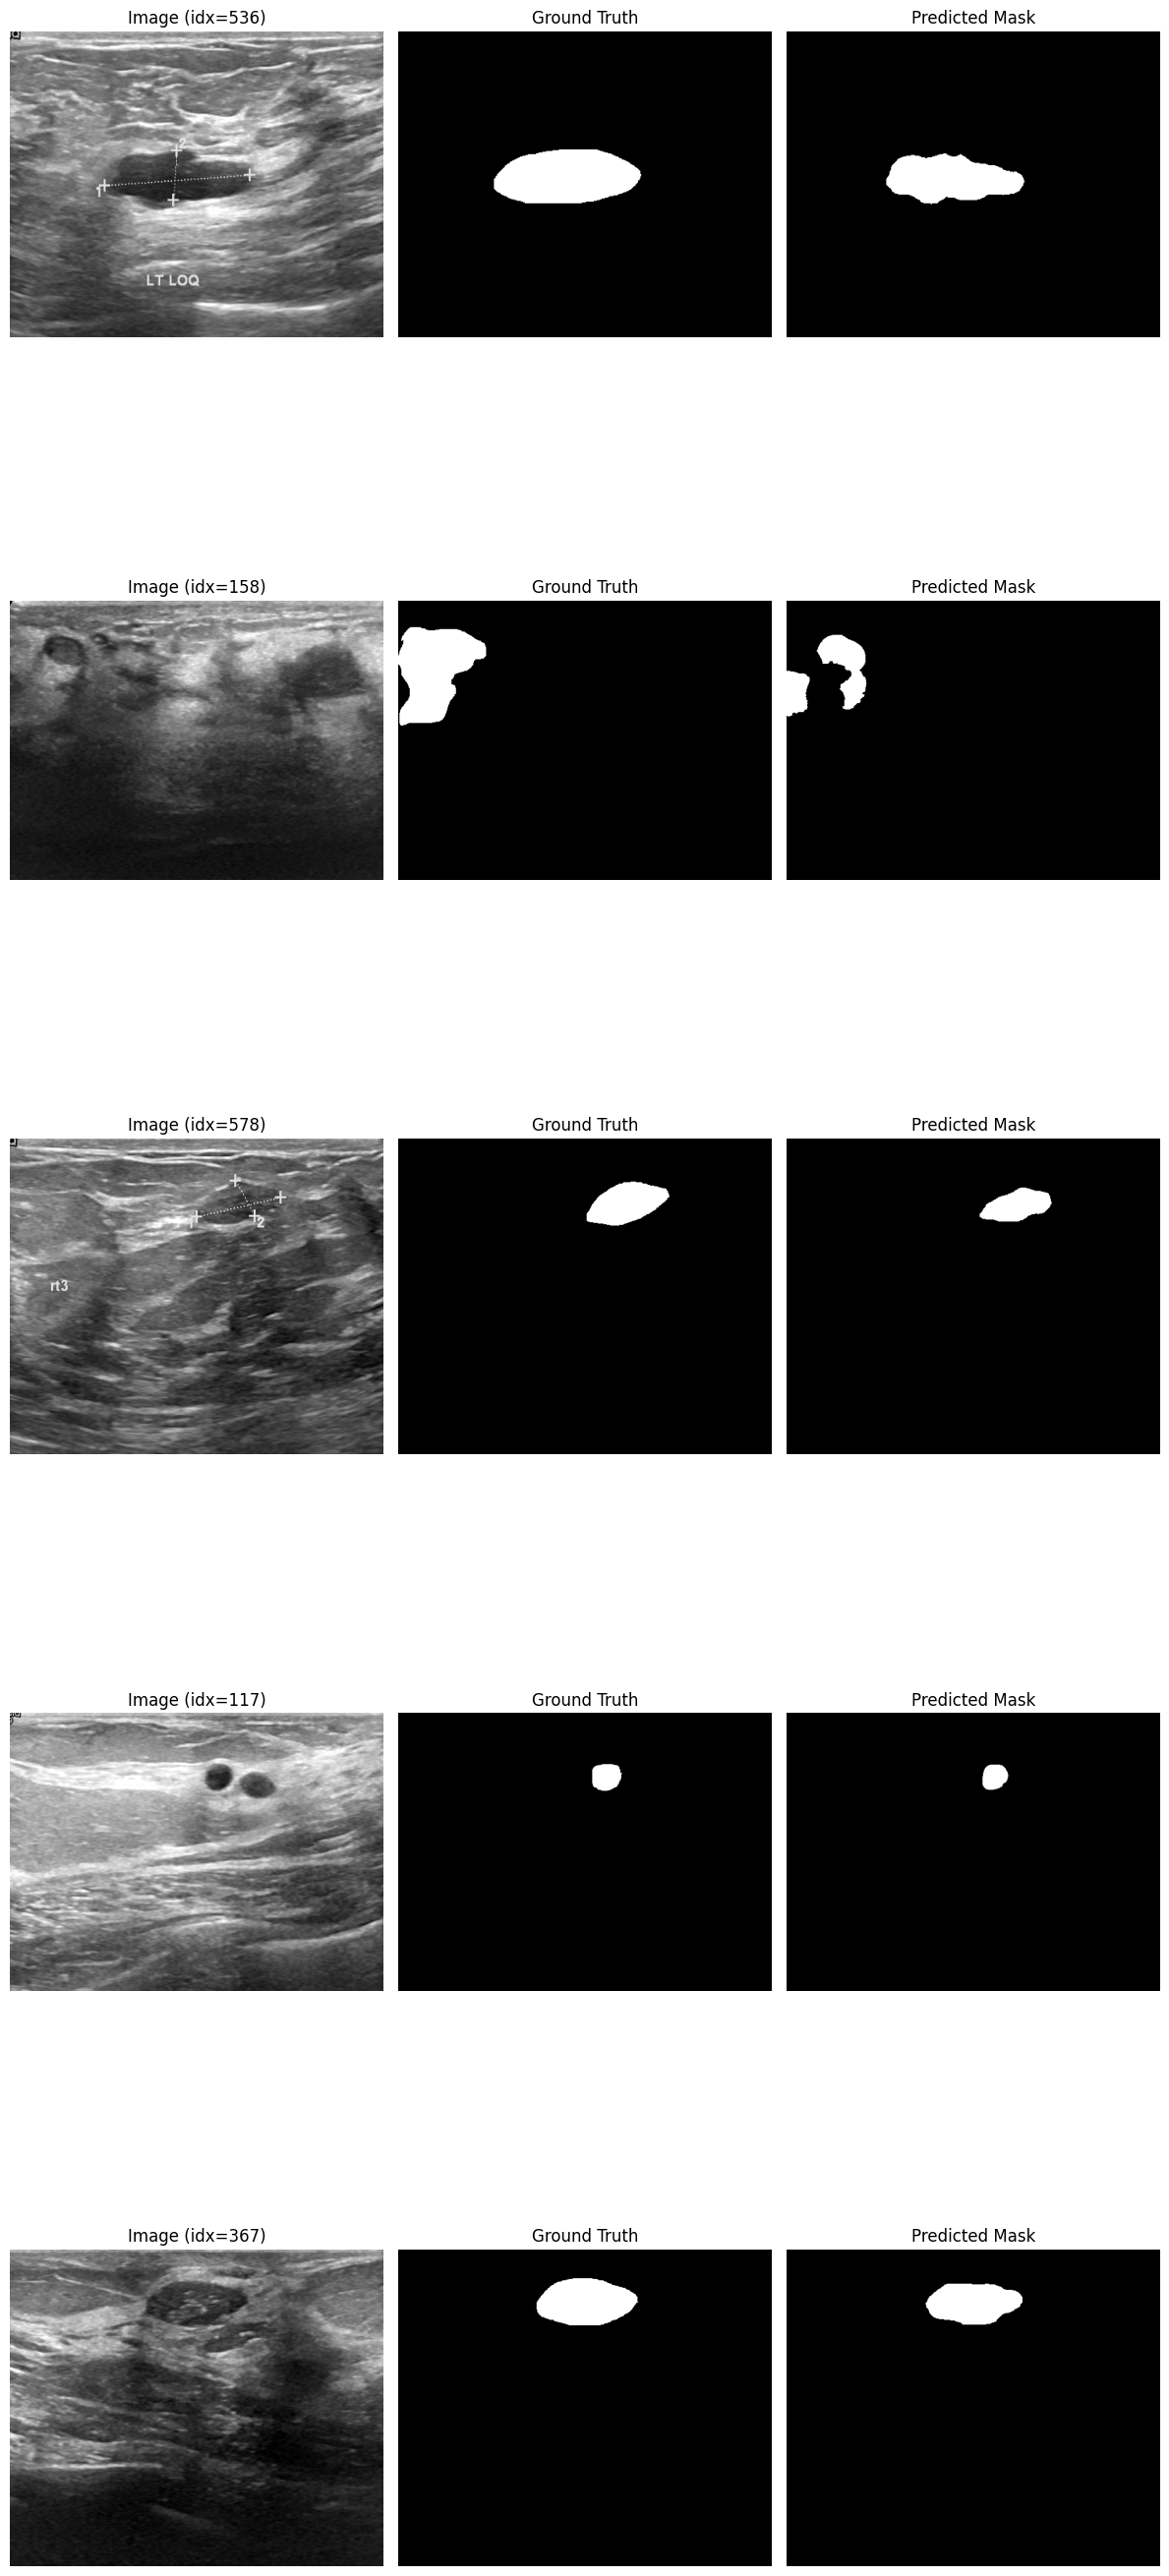

In [5]:
import os, cv2, numpy as np, pandas as pd, matplotlib.pyplot as plt, random

CSV = "/kaggle/working/index.csv"
PRED_DIR = "/kaggle/working/zero_shot_preds"
NUM_SHOW = 5  # number of random samples to display

# Load CSV
df = pd.read_csv(CSV)
total = len(df)

# Randomly select 5 unique indices
random.seed()  # change to random.seed(42) if you want reproducible results
indices = random.sample(range(total), k=min(NUM_SHOW, total))
print("🎲 Randomly selected indices:", indices)

# Create figure
plt.figure(figsize=(12, 6*NUM_SHOW))

for plot_idx, idx in enumerate(indices):
    img_path  = df.iloc[idx]["image"]
    mask_path = df.iloc[idx]["mask"]
    pred_path = os.path.join(PRED_DIR, f"{idx:03d}.png")

    # Read image, GT, and prediction
    img_gray  = cv2.imread(img_path,  cv2.IMREAD_GRAYSCALE)
    gt_mask   = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    pred_mask = cv2.imread(pred_path, cv2.IMREAD_GRAYSCALE)

    if img_gray is None or gt_mask is None or pred_mask is None:
        print(f"[WARN] Missing file for index {idx}")
        continue

    # Row offset in plot
    base = 3*plot_idx + 1

    # Plot 1: Original image
    plt.subplot(NUM_SHOW, 3, base)
    plt.imshow(img_gray, cmap="gray")
    plt.axis("off")
    plt.title(f"Image (idx={idx})")

    # Plot 2: Ground Truth
    plt.subplot(NUM_SHOW, 3, base + 1)
    plt.imshow(gt_mask, cmap="gray")
    plt.axis("off")
    plt.title("Ground Truth")

    # Plot 3: Predicted Mask
    plt.subplot(NUM_SHOW, 3, base + 2)
    plt.imshow(pred_mask, cmap="gray")
    plt.axis("off")
    plt.title("Predicted Mask")

plt.tight_layout()
plt.show()


In [13]:
import pandas as pd, os
df = pd.read_csv("/kaggle/working/index.csv")
print("rows:", len(df))
print(df.head(3))
assert {"image","mask"}.issubset(df.columns)
assert df.apply(lambda r: os.path.exists(r["image"]) and os.path.exists(r["mask"]), axis=1).all()


rows: 647
                                               image  \
0  /kaggle/input/breast-ultrasound-images-dataset...   
1  /kaggle/input/breast-ultrasound-images-dataset...   
2  /kaggle/input/breast-ultrasound-images-dataset...   

                                                mask label_name  label_id  
0  /kaggle/input/breast-ultrasound-images-dataset...  malignant         1  
1  /kaggle/input/breast-ultrasound-images-dataset...     benign         0  
2  /kaggle/input/breast-ultrasound-images-dataset...     benign         0  


In [14]:
# --- CREATE CSV: image,mask for all datapoints ---
import os, re, glob, pandas as pd

# 👉 set this to your dataset root
# Example layouts this handles:
#   /kaggle/input/busi/benign/*.png and benign/*_mask.png
#   /kaggle/input/busi/malignant/*.png and malignant/*_mask.png
# Works if files are like "benign (1).png" & "benign (1)_mask.png"
ROOT = "/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT"          # <--- CHANGE if needed
OUT_CSV = "/kaggle/working/index_all.csv"

# mask name normalizer: removes _mask suffix to match image base
def normalize_base(p):
    n = os.path.basename(p)
    n = n.replace("_mask", "")                # common
    n = re.sub(r"(?i)(_gt|_label|_seg)$", "", n)  # variants
    return os.path.splitext(n)[0]

# collect images and masks
img_paths = []
for cls in ["benign", "malignant", "normal"]:
    d = os.path.join(ROOT, cls)
    if os.path.isdir(d):
        img_paths += glob.glob(os.path.join(d, "*.png")) + glob.glob(os.path.join(d, "*.jpg"))

mask_paths = glob.glob(os.path.join(ROOT, "**", "*_mask.png"), recursive=True) + \
             glob.glob(os.path.join(ROOT, "**", "*_mask.jpg"), recursive=True) + \
             glob.glob(os.path.join(ROOT, "**", "*_gt.png"),   recursive=True) + \
             glob.glob(os.path.join(ROOT, "**", "*_label.png"),recursive=True)

# index masks by normalized base
mask_map = {}
for m in mask_paths:
    base = normalize_base(m)
    mask_map.setdefault(base, []).append(m)

rows = []
miss = 0
for img in img_paths:
    base = os.path.splitext(os.path.basename(img))[0]
    # try direct, try removing spaces for safety
    candidates = mask_map.get(base) or mask_map.get(base.replace(" ", "")) or []
    if not candidates:
        # last attempt: if image like "benign (12).png" look for "benign (12)_mask.png"
        direct = os.path.splitext(img)[0] + "_mask" + os.path.splitext(img)[1]
        if os.path.exists(direct):
            candidates = [direct]
    if candidates:
        # if multiple, pick the shortest path / first one
        m = sorted(candidates, key=len)[0]
        rows.append({"image": img, "mask": m})
    else:
        miss += 1

df = pd.DataFrame(rows)
df.to_csv(OUT_CSV, index=False)
print(f"CSV saved: {OUT_CSV}  | total rows: {len(df)}  | missing masks: {miss}")
if len(df) == 0:
    raise FileNotFoundError("No (image,mask) pairs found. Check ROOT path and naming.")


CSV saved: /kaggle/working/index_all.csv  | total rows: 780  | missing masks: 798


In [16]:
# medsam_train_all_then_infer_gt_free.py
import os, cv2, random, math, numpy as np, pandas as pd
from dataclasses import dataclass
from typing import Optional, Tuple

import torch, torch.nn as nn, torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

import albumentations as A
from albumentations.pytorch import ToTensorV2

from segment_anything import sam_model_registry
from segment_anything.utils.transforms import ResizeLongestSide
def sam_collate(batch):
    # batch: list of dicts length B
    out = {}
    keys = batch[0].keys()
    for k in keys:
        vals = [b[k] for b in batch]
        if k == "box":
            fixed = []
            for v in vals:
                if v is None:
                    fixed.append(np.empty((0,), np.float32))   # sentinel for "no box"
                else:
                    fixed.append(np.asarray(v, np.float32).reshape(4,))
            out[k] = fixed
        else:
            out[k] = vals
    return out

# -----------------------
# Config
# -----------------------
@dataclass
class CFG:
    CSV: str = "/kaggle/working/index_all.csv"    # CSV with columns: image,mask (mask used only for TRAIN)
    WEIGHTS_DIR: str = "/kaggle/working/weights"  # contains medsam_vit_b.pth
    CKPT_INIT: str = "medsam_vit_b.pth"
    OUT_DIR: str = "/kaggle/working/medsam_all_train"
    IMAGE_SIZE: int = 1024

    EPOCHS: int = 5
    BATCH_SIZE: int = 2
    LR: float = 5e-5
    WD: float = 0.0
    SEED: int = 42
    NUM_WORKERS: int = 2

    DEVICE: str = "cuda" if torch.cuda.is_available() else "cpu"
    SAVE_OVERLAYS: bool = True   # also save color overlays for quick visual checks

os.makedirs(CFG.OUT_DIR, exist_ok=True)
random.seed(CFG.SEED); np.random.seed(CFG.SEED); torch.manual_seed(CFG.SEED)

# -----------------------
# Utilities
# -----------------------
def mask_to_box(mask: np.ndarray) -> Optional[np.ndarray]:
    ys, xs = np.where(mask > 0)
    if len(xs) == 0: return None
    return np.array([xs.min(), ys.min(), xs.max(), ys.max()], dtype=np.int64)

def sample_pos_neg_points(mask: np.ndarray, n_pos=1, n_neg=1) -> Tuple[np.ndarray, np.ndarray]:
    pos = np.column_stack(np.where(mask > 0))
    neg = np.column_stack(np.where(mask == 0))
    pts_pos, pts_neg = [], []
    if len(pos) > 0:
        for _ in range(n_pos):
            y, x = pos[random.randrange(len(pos))]
            pts_pos.append([x, y])
    if len(neg) > 0:
        for _ in range(n_neg):
            y, x = neg[random.randrange(len(neg))]
            pts_neg.append([x, y])
    pts = np.array(pts_pos + pts_neg, dtype=np.float32)
    lbl = np.array([1] * len(pts_pos) + [0] * len(pts_neg), dtype=np.int32)
    return pts, lbl

def center_click(h, w):
    return np.array([[w//2, h//2]], np.float32), np.array([1], np.int32)

# -----------------------
# Dataset (TRAIN on 100% data)
# -----------------------
class BUSIAllTrain(Dataset):
    """
    Uses ALL rows for training.
    Returns image + GT-derived prompts (OK for training), and the mask target.
    """
    def __init__(self, csv_path, image_size=CFG.IMAGE_SIZE):
        self.df = pd.read_csv(csv_path)
        assert {"image","mask"}.issubset(self.df.columns), "CSV must have image,mask columns"
        self.size = image_size
        self.transforms = A.Compose([
            A.LongestMaxSize(max_size=image_size),
            A.PadIfNeeded(image_size, image_size, border_mode=cv2.BORDER_CONSTANT, value=0, mask_value=0),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            A.ShiftScaleRotate(shift_limit=0.02, scale_limit=0.10, rotate_limit=10,
                               border_mode=cv2.BORDER_CONSTANT, value=0, mask_value=0, p=0.5),
            A.GaussianBlur(blur_limit=(3,5), p=0.2),
            A.RandomBrightnessContrast(0.05, 0.05, p=0.2),
        ])

    def __len__(self): return len(self.df)

    def __getitem__(self, i):
        row = self.df.iloc[i]
        img = cv2.imread(row["image"], cv2.IMREAD_GRAYSCALE)
        msk = cv2.imread(row["mask"],  cv2.IMREAD_GRAYSCALE)
        if img is None: raise FileNotFoundError(row["image"])
        if msk is None: raise FileNotFoundError(row["mask"])
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        msk = (msk>0).astype(np.uint8)

        out = self.transforms(image=img, mask=msk)
        img, msk = out["image"], out["mask"]

        # TRAIN: prompts from GT (this is fine during training)
        box = mask_to_box(msk)
        pts, lbl = sample_pos_neg_points(msk, n_pos=1, n_neg=1)

        return {
            "image": img,                 # H,W,3 uint8
            "mask":  msk,                 # H,W uint8 {0,1}
            "box":   box,                 # [x0,y0,x1,y1] or None
            "points": pts,                # Nx2 float32
            "labels": lbl,                # N int32
            "path":  row["image"],
        }

# -----------------------
# Losses & Metric
# -----------------------
class DiceLoss(nn.Module):
    def __init__(self, eps=1e-6): super().__init__(); self.eps=eps
    def forward(self, logits, targets):
        probs = torch.sigmoid(logits)
        targets = targets.float()
        num = 2*(probs*targets).sum(dim=(1,2,3))
        den = probs.pow(2).sum(dim=(1,2,3)) + targets.pow(2).sum(dim=(1,2,3)) + self.eps
        return 1 - (num/den).mean()

def bce_dice(logits, targets):
    return F.binary_cross_entropy_with_logits(logits, targets.float()) + DiceLoss()(logits, targets)

# -----------------------
# SAM helpers
# -----------------------
def set_trainable_layers(sam, train=True):
    for p in sam.image_encoder.parameters(): p.requires_grad = False  # freeze encoder
    for p in sam.prompt_encoder.parameters(): p.requires_grad = train
    for p in sam.mask_decoder.parameters(): p.requires_grad = train

def prepare_image(sam, image_np: np.ndarray, device):
    tfm = ResizeLongestSide(sam.image_encoder.img_size)
    im = tfm.apply_image(image_np)
    im = torch.as_tensor(im, device=device).permute(2,0,1).contiguous()[None]
    im = im.float() / 255.0
    return im, tfm

def prompts_to_embeddings(sam, tfm, image_np, points, labels, box, device):
    # image_np: H,W,3 uint8
    H, W = image_np.shape[:2]

    # ---- Points ----
    if points is not None and len(points) > 0:
        # to numpy float32, shape (N,2)
        if isinstance(points, torch.Tensor):
            points = points.detach().cpu().numpy()
        points = np.asarray(points, dtype=np.float32).reshape(-1, 2)

        if isinstance(labels, torch.Tensor):
            labels = labels.detach().cpu().numpy()
        labels = np.asarray(labels, dtype=np.int64).reshape(-1)

        pts_img = tfm.apply_coords(points, (H, W))              # numpy
        pts_t  = torch.as_tensor(pts_img[None, ...], dtype=torch.float32, device=device)  # (1,N,2)
        lbl_t  = torch.as_tensor(labels[None, ...], dtype=torch.int64,  device=device)     # (1,N)
        points_tuple = (pts_t, lbl_t)
    else:
        points_tuple = None

    # ---- Box ----
    if box is not None:
        # accept list / numpy / torch of shape (4,)
        if isinstance(box, torch.Tensor):
            box = box.detach().cpu().numpy()
        box = np.asarray(box, dtype=np.float32).reshape(1, 4)   # (1,4)
        bx_img = tfm.apply_boxes(box, (H, W))                   # numpy (1,4)
        bx_t   = torch.as_tensor(bx_img, dtype=torch.float32, device=device)
    else:
        bx_t = None

    # ---- Encode prompts ----
    return sam.prompt_encoder(points=points_tuple, boxes=bx_t, masks=None)

def predict_lowres(sam, image_embeddings, sparse_embeddings, dense_embeddings, multimask=False):
    return sam.mask_decoder(
        image_embeddings=image_embeddings,
        image_pe=sam.prompt_encoder.get_dense_pe(),
        sparse_prompt_embeddings=sparse_embeddings,
        dense_prompt_embeddings=dense_embeddings,
        multimask_output=multimask
    )

# -----------------------
# Data & Model
# -----------------------
train_ds = BUSIAllTrain(CFG.CSV, CFG.IMAGE_SIZE)
train_dl = DataLoader(train_ds, batch_size=1, shuffle=True, num_workers=CFG.NUM_WORKERS)

ckpt_path = os.path.join(CFG.WEIGHTS_DIR, CFG.CKPT_INIT)
sam = sam_model_registry["vit_b"](checkpoint=ckpt_path).to(CFG.DEVICE)
set_trainable_layers(sam, True)

optim = torch.optim.AdamW(filter(lambda p: p.requires_grad, sam.parameters()), lr=CFG.LR, weight_decay=CFG.WD)
scaler = torch.cuda.amp.GradScaler(enabled=(CFG.DEVICE=="cuda"))

# -----------------------
# Train (ALL data) with progress bar
# -----------------------
for epoch in range(1, CFG.EPOCHS+1):
    sam.train()
    pbar = tqdm(train_dl, desc=f"Epoch {epoch}/{CFG.EPOCHS} [train]", ncols=100)
    running = 0.0

    for batch in pbar:
        image_np = batch["image"][0].numpy()    # H,W,3 uint8
        mask_np  = batch["mask"][0].numpy()     # H,W uint8
        box      = batch["box"][0] if batch["box"] is not None else None
        pts      = batch["points"][0].numpy() if len(batch["points"][0])>0 else np.empty((0,2), np.float32)
        lbl      = batch["labels"][0].numpy() if len(batch["labels"][0])>0 else np.empty((0,), np.int32)

        im_t, tfm = prepare_image(sam, image_np, CFG.DEVICE)

        with torch.no_grad():
            image_embeddings = sam.image_encoder(im_t)   # (1,256,64,64) for ViT-B

        sparse_emb, dense_emb = prompts_to_embeddings(sam, tfm, image_np, pts, lbl, box, CFG.DEVICE)

        with torch.cuda.amp.autocast(enabled=(CFG.DEVICE=="cuda")):
            low_res_masks, _ = predict_lowres(sam, image_embeddings, sparse_emb, dense_emb, multimask=False)
            H, W = mask_np.shape
            pred_mask = F.interpolate(low_res_masks, size=(H, W), mode="bilinear", align_corners=False)  # (1,1,H,W)
            gt = torch.from_numpy(mask_np[None,None,...]).to(CFG.DEVICE)
            loss = bce_dice(pred_mask, gt)

        optim.zero_grad(set_to_none=True)
        scaler.scale(loss).backward()
        scaler.step(optim)
        scaler.update()

        running += loss.item()
        pbar.set_postfix(loss=f"{loss.item():.4f}", avg=f"{(running/max(1,pbar.n)):.4f}")

# Save final checkpoint
final_ckpt = os.path.join(CFG.OUT_DIR, "medsam_all_train_final.pth")
torch.save(sam.state_dict(), final_ckpt)
print(f"Saved final checkpoint to: {final_ckpt}")

# -----------------------
# Inference on ALL images (GT-FREE) with progress bar
#   - DOES NOT read mask for prompts
#   - Uses center positive + 4 negative border clicks
# -----------------------
sam.eval()
os.makedirs(os.path.join(CFG.OUT_DIR, "preds_all_gt_free"), exist_ok=True)

def infer_gt_free(image_np, model, device):
    H, W = image_np.shape[:2]
    im_t, tfm = prepare_image(model, image_np, device)
    with torch.no_grad():
        image_embeddings = model.image_encoder(im_t)

        # GT-FREE prompts: center + border negatives
        pos, pos_lbl = center_click(H, W)
        neg = np.array([[5,5],[W-6,5],[5,H-6],[W-6,H-6]], np.float32)
        pts = np.vstack([pos, neg])
        lbl = np.concatenate([pos_lbl, np.zeros(len(neg), np.int32)])

        # encode prompts
        pts_tfm = tfm.apply_coords(pts, (H, W))
        sparse_emb, dense_emb = model.prompt_encoder(
            points=(torch.as_tensor(pts_tfm[None,...], dtype=torch.float32, device=device),
                    torch.as_tensor(lbl[None,...], dtype=torch.int64, device=device)),
            boxes=None, masks=None
        )

        low_res_masks, _ = predict_lowres(model, image_embeddings, sparse_emb, dense_emb, multimask=True)
        # pick best variant by mean logit
        best_idx = low_res_masks.mean(dim=(2,3)).squeeze(0).argmax().item()
        low_res = low_res_masks[:, best_idx:best_idx+1]
        pred = F.interpolate(low_res, size=(H, W), mode="bilinear", align_corners=False)
        return pred.sigmoid()[0,0].cpu().numpy()  # float mask [0..1]

df = pd.read_csv(CFG.CSV)
pbar = tqdm(range(len(df)), desc="Inference [GT-free on ALL images]", ncols=100)

for i in pbar:
    row = df.iloc[i]
    img = cv2.imread(row["image"], cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"[WARN] could not read image: {row['image']}")
        continue
    img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    pm = infer_gt_free(img_rgb, sam, CFG.DEVICE)   # float [0..1]
    pm_u8 = (pm > 0.5).astype(np.uint8) * 255

    outp = os.path.join(CFG.OUT_DIR, "preds_all_gt_free", f"{i:03d}.png")
    cv2.imwrite(outp, pm_u8)

    if CFG.SAVE_OVERLAYS:
        ov = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        ov[pm_u8>0] = (0,0,255)
        cv2.imwrite(outp.replace(".png","_ov.png"), ov)

print("All GT-free predictions saved to:", os.path.join(CFG.OUT_DIR, "preds_all_gt_free"))


/tmp/ipykernel_140/3256548816.py:81: UserWarning: Argument(s) 'value, mask_value' are not valid for transform PadIfNeeded
  A.PadIfNeeded(image_size, image_size, border_mode=cv2.BORDER_CONSTANT, value=0, mask_value=0),
/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/tmp/ipykernel_140/3256548816.py:84: UserWarning: Argument(s) 'value, mask_value' are not valid for transform ShiftScaleRotate
  A.ShiftScaleRotate(shift_limit=0.02, scale_limit=0.10, rotate_limit=10,
/tmp/ipykernel_140/3256548816.py:203: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=(CFG.DEVICE=="cuda"))
Epoch 1/20 [train]:   0%|                                                   | 0/780 [00:00<?, ?it/s]/tmp/ipykernel_140/32

TypeError: Caught TypeError in DataLoader worker process 1.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/collate.py", line 171, in collate
    {
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/collate.py", line 172, in <dictcomp>
    key: collate(
         ^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/collate.py", line 240, in collate
    raise TypeError(default_collate_err_msg_format.format(elem_type))
TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'NoneType'>

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/worker.py", line 349, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/fetch.py", line 55, in fetch
    return self.collate_fn(data)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/collate.py", line 398, in default_collate
    return collate(batch, collate_fn_map=default_collate_fn_map)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/collate.py", line 191, in collate
    return {
           ^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/collate.py", line 192, in <dictcomp>
    key: collate([d[key] for d in batch], collate_fn_map=collate_fn_map)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/collate.py", line 240, in collate
    raise TypeError(default_collate_err_msg_format.format(elem_type))
TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'NoneType'>


In [6]:
import os, cv2, numpy as np, pandas as pd

CSV = "/kaggle/working/index.csv"
PRED_DIR = "/kaggle/working/zero_shot_preds"
NUM_SHOW = 25
OUT_CSV = "/kaggle/working/metrics_5.csv"

eps = 1e-6

def _prep(pred, gt):
    """Resize pred to gt size if needed, and binarize both."""
    if pred is None or gt is None:
        return None, None
    # binarize gt
    gt_bin = (gt > 0)
    # prepare pred
    if pred.shape != gt.shape:
        pred = cv2.resize((pred > 0).astype(np.uint8)*255,
                          (gt.shape[1], gt.shape[0]),
                          interpolation=cv2.INTER_NEAREST)
    pred_bin = (pred > 0)
    return pred_bin, gt_bin

def dice_coefficient(pred, gt):
    pred, gt = _prep(pred, gt)
    if pred is None: return np.nan
    inter = np.logical_and(pred, gt).sum()
    return (2.0 * inter) / (pred.sum() + gt.sum() + eps)

def jaccard_index(pred, gt):
    pred, gt = _prep(pred, gt)
    if pred is None: return np.nan
    inter = np.logical_and(pred, gt).sum()
    union = np.logical_or(pred, gt).sum()
    return inter / (union + eps)

def precision(pred, gt):
    pred, gt = _prep(pred, gt)
    if pred is None: return np.nan
    tp = np.logical_and(pred, gt).sum()
    fp = np.logical_and(pred, np.logical_not(gt)).sum()
    return tp / (tp + fp + eps)

def recall(pred, gt):
    pred, gt = _prep(pred, gt)
    if pred is None: return np.nan
    tp = np.logical_and(pred, gt).sum()
    fn = np.logical_and(np.logical_not(pred), gt).sum()
    return tp / (tp + fn + eps)

def accuracy(pred, gt):
    pred, gt = _prep(pred, gt)
    if pred is None: return np.nan
    return (pred == gt).sum() / (gt.size + eps)

# ---- compute for first 5 ----
df = pd.read_csv(CSV)
rows = []

for idx in range(NUM_SHOW):
    gt_path   = df.iloc[idx]["mask"]
    pred_path = os.path.join(PRED_DIR, f"{idx:03d}.png")

    gt  = cv2.imread(gt_path,  cv2.IMREAD_GRAYSCALE)
    prd = cv2.imread(pred_path, cv2.IMREAD_GRAYSCALE)

    if gt is None or prd is None:
        print(f"[WARN] Missing file at index {idx}: gt={gt_path} pred={pred_path}")
        continue

    d  = dice_coefficient(prd, gt)
    iou = jaccard_index(prd, gt)
    pre = precision(prd, gt)
    rec = recall(prd, gt)
    acc = accuracy(prd, gt)

    rows.append({
        "index": idx,
        "gt": gt_path,
        "pred": pred_path,
        "dice": d,
        "iou": iou,
        "precision": pre,
        "recall": rec,
        "accuracy": acc
    })

metrics_df = pd.DataFrame(rows)
print(metrics_df.to_string(index=False))

# Averages
if len(metrics_df) > 0:
    avg = metrics_df[["dice","iou","precision","recall","accuracy"]].mean()
    print("\nAverages over", len(metrics_df), "images:")
    for k, v in avg.items():
        print(f"{k:>10}: {v:.4f}")

    metrics_df.to_csv(OUT_CSV, index=False)
    print(f"\nSaved metrics to {OUT_CSV}")


 index                                                                                                     gt                                    pred     dice      iou  precision   recall  accuracy
     0  /kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant/malignant (88)_mask.png /kaggle/working/zero_shot_preds/000.png 0.908016 0.831529   0.990814 0.837989  0.987261
     1       /kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (298)_mask.png /kaggle/working/zero_shot_preds/001.png 0.850970 0.740598   0.973384 0.755906  0.986713
     2         /kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (9)_mask.png /kaggle/working/zero_shot_preds/002.png 0.938669 0.884427   0.997256 0.886584  0.987152
     3        /kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (91)_mask.png /kaggle/working/zero_shot_preds/003.png 0.716390 0.558106   0.972500 0.567055  0.997286
     4    

In [7]:
# === SAM zero-shot predictions (GT box prompt) ===
import os, cv2, numpy as np, pandas as pd
from segment_anything import sam_model_registry, SamPredictor

CSV = "/kaggle/working/index.csv"
WEIGHTS_DIR = "/kaggle/working/weights"
SAM_CKPT = f"{WEIGHTS_DIR}/sam_vit_b_01ec64.pth"
OUT_SAM = "/kaggle/working/preds_sam"

os.makedirs(WEIGHTS_DIR, exist_ok=True)
os.makedirs(OUT_SAM, exist_ok=True)

# 1) Get SAM weights if missing
if not os.path.exists(SAM_CKPT):
    import urllib.request
    print("Downloading SAM ViT-B weights...")
    urllib.request.urlretrieve(
        "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth",
        SAM_CKPT
    )

# 2) Load model
DEVICE = "cuda" if cv2.ocl.haveOpenCL() else "cuda"  # keep 'cuda' for Kaggle GPUs
sam = sam_model_registry["vit_b"](checkpoint=SAM_CKPT).to(DEVICE)
sam.eval()
predictor = SamPredictor(sam)

# 3) Helper: get GT box from mask
def gt_box_from_mask(mask_path):
    m = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if m is None: return None
    ys, xs = np.where(m > 0)
    if len(xs) == 0: return None
    return np.array([int(xs.min()), int(ys.min()), int(xs.max()), int(ys.max())])

# 4) Predict for all rows (skips if file already exists)
df = pd.read_csv(CSV)
done = 0
for idx, row in df.iterrows():
    out_path = os.path.join(OUT_SAM, f"{idx:03d}.png")
    if os.path.exists(out_path):
        done += 1
        continue

    img_path, mask_path = row["image"], row["mask"]
    img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img_gray is None:
        print(f"[SAM] skip idx {idx}: image missing")
        continue

    img_rgb = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB)
    predictor.set_image(img_rgb)

    box = gt_box_from_mask(mask_path)
    if box is not None:
        masks, scores, _ = predictor.predict(box=box, multimask_output=False)
    else:
        # Fallback: one positive click at center
        h, w = img_rgb.shape[:2]
        points = np.array([[w//2, h//2]]); labels = np.array([1])
        masks, scores, _ = predictor.predict(point_coords=points, point_labels=labels, multimask_output=False)

    cv2.imwrite(out_path, (masks[0]*255).astype(np.uint8))
    done += 1

print(f"[SAM] wrote/kept {done} prediction files in {OUT_SAM}")


[SAM] wrote/kept 647 prediction files in /kaggle/working/preds_sam


🎲 Selected indices: [114, 25, 281, 250, 228]


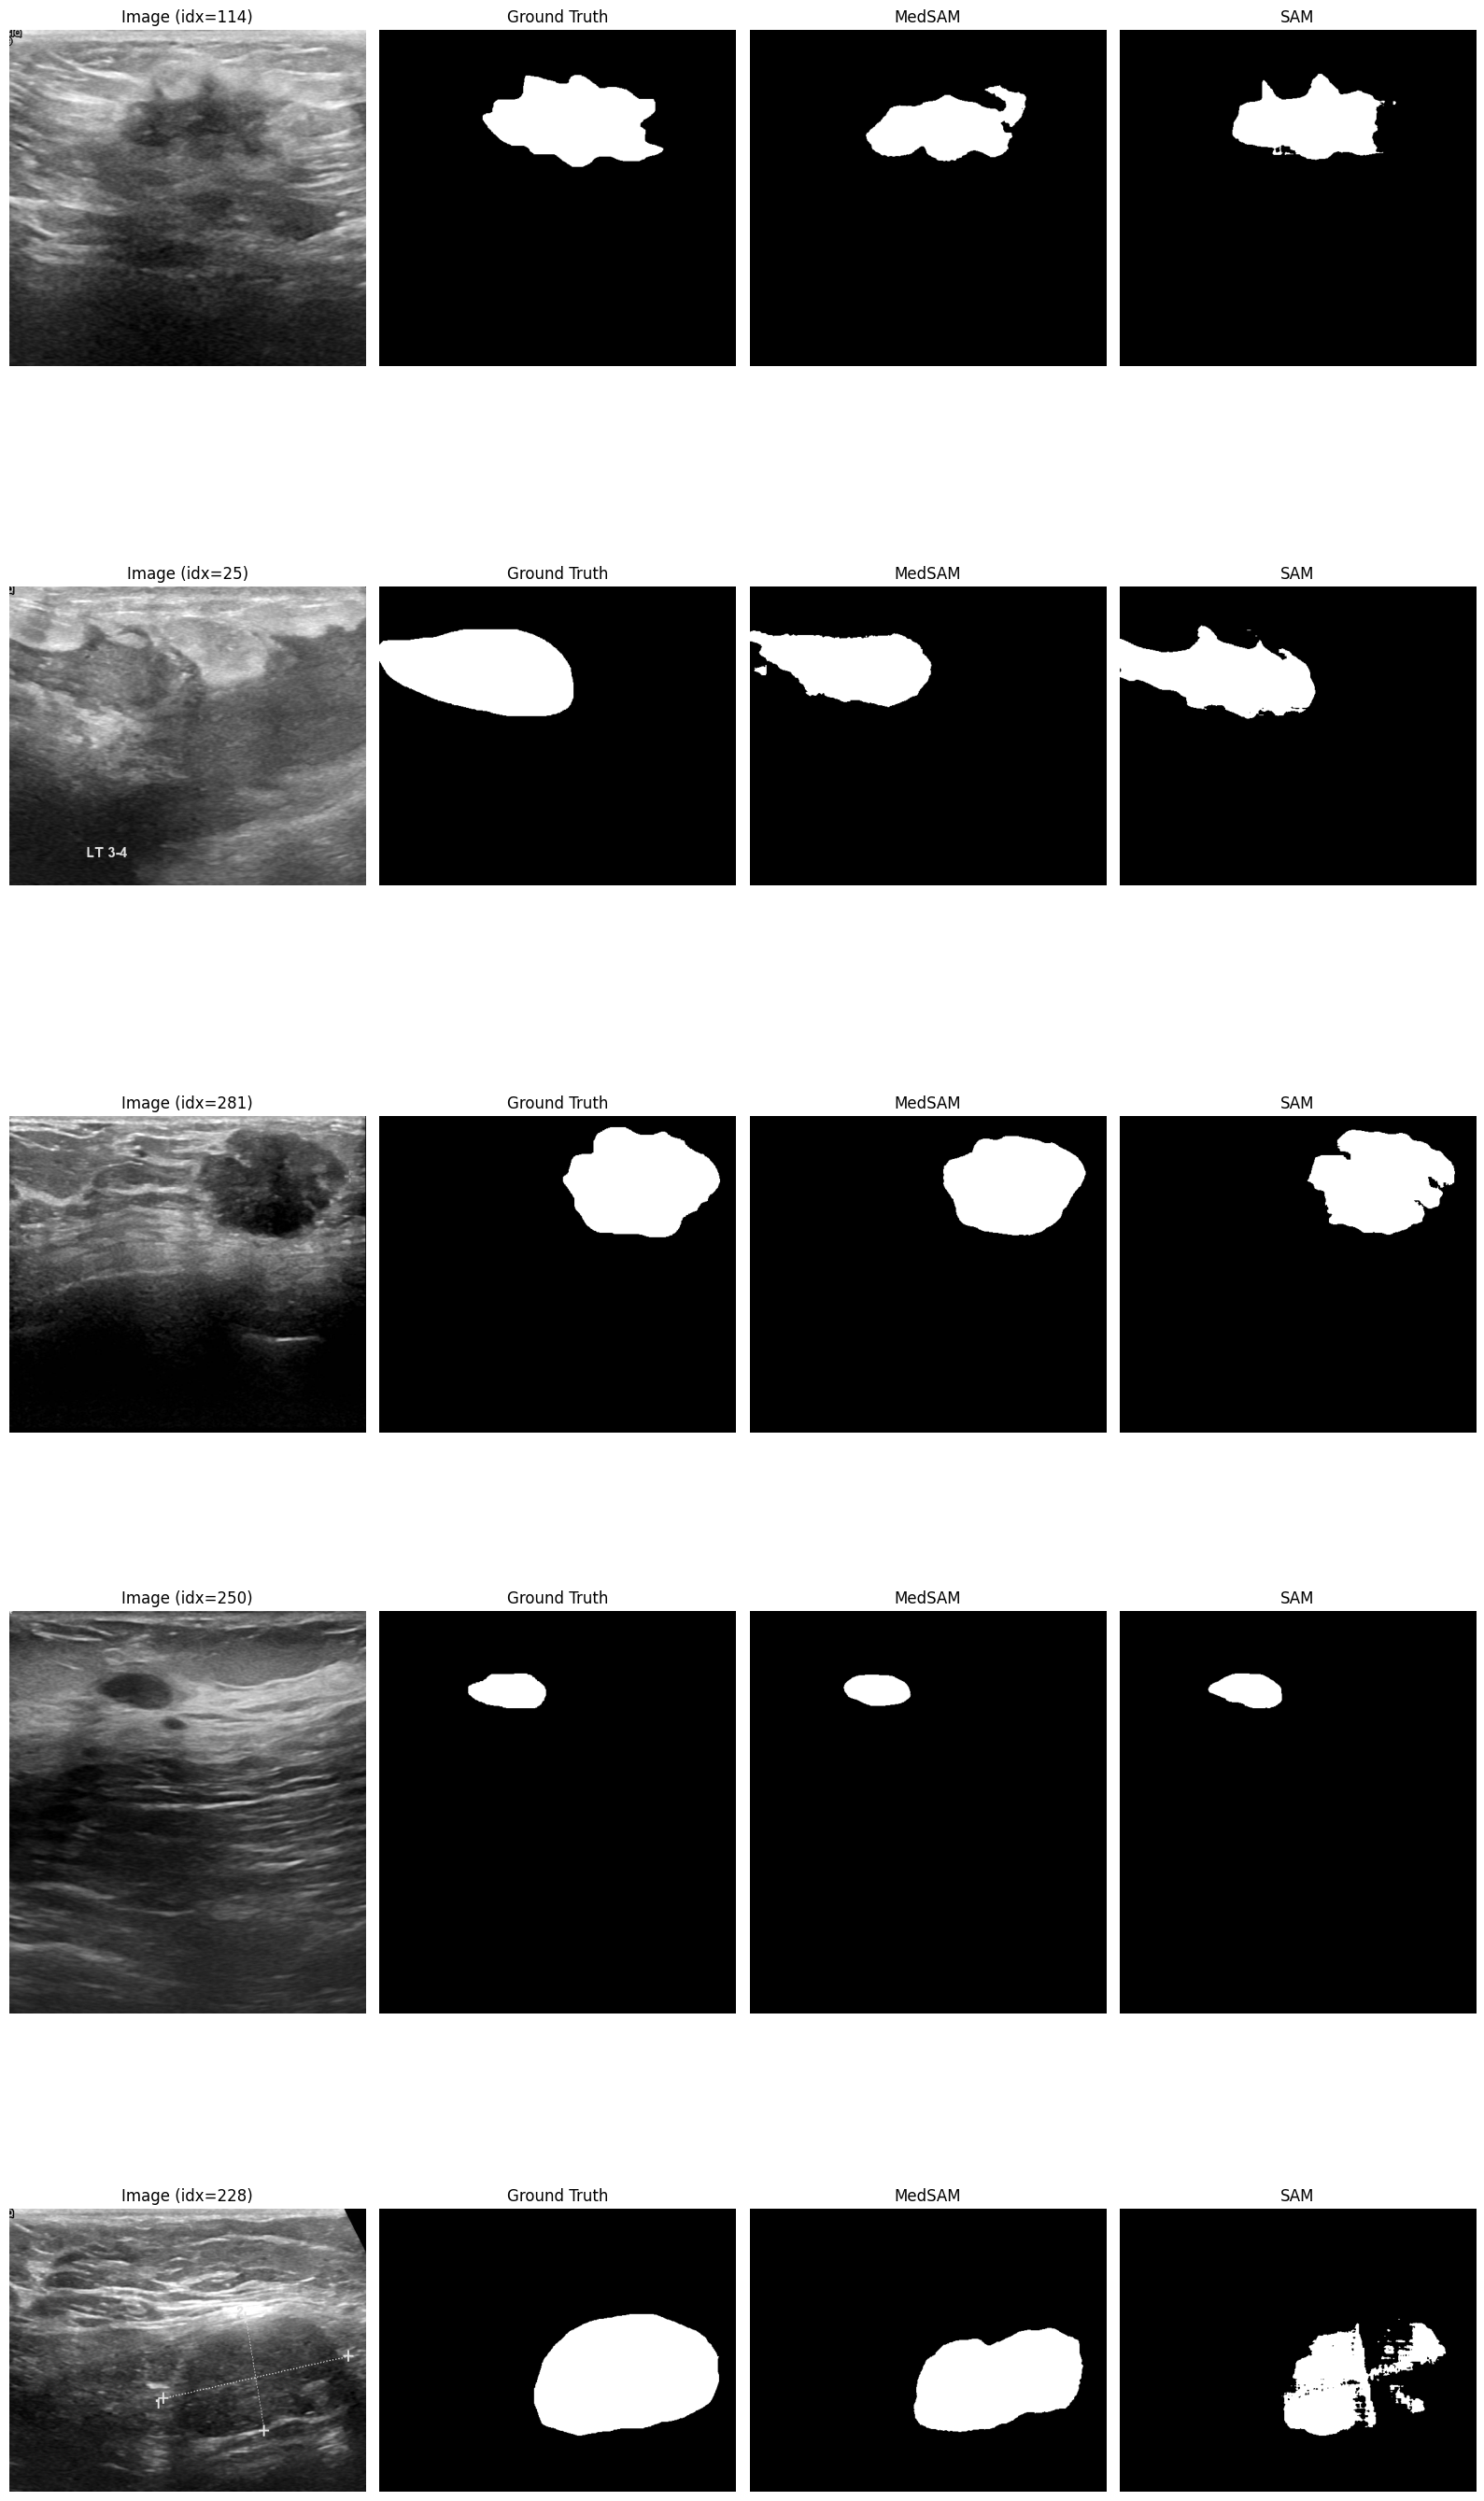

In [8]:
import os, cv2, numpy as np, pandas as pd, matplotlib.pyplot as plt, random

CSV = "/kaggle/working/index.csv"
MED_PRED_DIR = "/kaggle/working/zero_shot_preds"  # <-- change if your MedSAM preds are elsewhere
SAM_PRED_DIR = "/kaggle/working/preds_sam"
N = 5
eps = 1e-6

# --- metrics ---
def _prep(pred, gt):
    if pred.shape != gt.shape:
        pred = cv2.resize((pred > 0).astype(np.uint8)*255,
                          (gt.shape[1], gt.shape[0]),
                          interpolation=cv2.INTER_NEAREST)
    return (pred > 0), (gt > 0)

def dice(pr, gt):   pr, gt = _prep(pr, gt); inter = np.logical_and(pr, gt).sum(); return (2*inter)/(pr.sum()+gt.sum()+eps)
def iou(pr, gt):    pr, gt = _prep(pr, gt); inter = np.logical_and(pr, gt).sum(); union = np.logical_or(pr, gt).sum(); return inter/(union+eps)
def prec(pr, gt):   pr, gt = _prep(pr, gt); tp = np.logical_and(pr, gt).sum(); fp = np.logical_and(pr, np.logical_not(gt)).sum(); return tp/(tp+fp+eps)
def rec(pr, gt):    pr, gt = _prep(pr, gt); tp = np.logical_and(pr, gt).sum(); fn = np.logical_and(np.logical_not(pr), gt).sum(); return tp/(tp+fn+eps)
def acc(pr, gt):    pr, gt = _prep(pr, gt); return (pr==gt).sum()/(gt.size+eps)

# Load table and pick random indices that have BOTH prediction files
df = pd.read_csv(CSV)
total = len(df)
all_indices = list(range(total))
random.seed(42)  # change or remove to shuffle each run

valid = []
for idx in random.sample(all_indices, k=total):
    med_p = os.path.join(MED_PRED_DIR, f"{idx:03d}.png")
    sam_p = os.path.join(SAM_PRED_DIR, f"{idx:03d}.png")
    if os.path.exists(med_p) and os.path.exists(sam_p):
        valid.append(idx)
    if len(valid) == N: break

if len(valid) < N:
    print(f"[WARN] only found {len(valid)} indices with both predictions; displaying those.")

print("🎲 Selected indices:", valid)

# Plot: columns = Image | GT | MedSAM (with metrics) | SAM (with metrics)
plt.figure(figsize=(16, 6*len(valid)))

for r, idx in enumerate(valid):
    img_path, gt_path = df.iloc[idx]["image"], df.iloc[idx]["mask"]
    img  = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    gt   = cv2.imread(gt_path,  cv2.IMREAD_GRAYSCALE)
    med  = cv2.imread(os.path.join(MED_PRED_DIR, f"{idx:03d}.png"), cv2.IMREAD_GRAYSCALE)
    sam  = cv2.imread(os.path.join(SAM_PRED_DIR, f"{idx:03d}.png"), cv2.IMREAD_GRAYSCALE)

    if img is None or gt is None or med is None or sam is None:
        print(f"[WARN] missing file(s) at idx {idx}")
        continue

    # metrics
    d_med, i_med, p_med, r_med, a_med = dice(med, gt), iou(med, gt), prec(med, gt), rec(med, gt), acc(med, gt)
    d_sam, i_sam, p_sam, r_sam, a_sam = dice(sam, gt), iou(sam, gt), prec(sam, gt), rec(sam, gt), acc(sam, gt)

    base = 4*r + 1
    # Image
    plt.subplot(len(valid), 4, base)
    plt.imshow(img, cmap="gray"); plt.axis("off"); plt.title(f"Image (idx={idx})")

    # Ground Truth
    plt.subplot(len(valid), 4, base+1)
    plt.imshow(gt, cmap="gray"); plt.axis("off"); plt.title("Ground Truth")

    # MedSAM
    plt.subplot(len(valid), 4, base+2)
    plt.imshow(med, cmap="gray"); plt.axis("off"); plt.title("MedSAM")
    plt.xlabel(f"Dice={d_med:.3f}  IoU={i_med:.3f}\nP={p_med:.3f}  R={r_med:.3f}  Acc={a_med:.3f}")

    # SAM
    plt.subplot(len(valid), 4, base+3)
    plt.imshow(sam, cmap="gray"); plt.axis("off"); plt.title("SAM")
    plt.xlabel(f"Dice={d_sam:.3f}  IoU={i_sam:.3f}\nP={p_sam:.3f}  R={r_sam:.3f}  Acc={a_sam:.3f}")

plt.tight_layout()
plt.show()


In [9]:
import os, cv2, numpy as np, pandas as pd, random

# === Paths ===
CSV = "/kaggle/working/index.csv"
MED_PRED_DIR = "/kaggle/working/zero_shot_preds"  # MedSAM preds
SAM_PRED_DIR = "/kaggle/working/preds_sam"        # SAM preds
OUT_CSV = "/kaggle/working/metrics_compare_medsam_sam.csv"
N = 5
eps = 1e-6

# --- metric functions ---
def _prep(pred, gt):
    if pred.shape != gt.shape:
        pred = cv2.resize((pred > 0).astype(np.uint8)*255,
                          (gt.shape[1], gt.shape[0]),
                          interpolation=cv2.INTER_NEAREST)
    return (pred > 0), (gt > 0)

def dice(pr, gt):   pr, gt = _prep(pr, gt); inter = np.logical_and(pr, gt).sum(); return (2*inter)/(pr.sum()+gt.sum()+eps)
def iou(pr, gt):    pr, gt = _prep(pr, gt); inter = np.logical_and(pr, gt).sum(); union = np.logical_or(pr, gt).sum(); return inter/(union+eps)
def prec(pr, gt):   pr, gt = _prep(pr, gt); tp = np.logical_and(pr, gt).sum(); fp = np.logical_and(pr, np.logical_not(gt)).sum(); return tp/(tp+fp+eps)
def rec(pr, gt):    pr, gt = _prep(pr, gt); tp = np.logical_and(pr, gt).sum(); fn = np.logical_and(np.logical_not(pr), gt).sum(); return tp/(tp+fn+eps)
def acc(pr, gt):    pr, gt = _prep(pr, gt); return (pr==gt).sum()/(gt.size+eps)

# --- pick random valid indices (must have both predictions) ---
df = pd.read_csv(CSV)
total = len(df)
all_indices = list(range(total))
random.seed(42)

valid = []
for idx in random.sample(all_indices, k=total):
    med_p = os.path.join(MED_PRED_DIR, f"{idx:03d}.png")
    sam_p = os.path.join(SAM_PRED_DIR, f"{idx:03d}.png")
    if os.path.exists(med_p) and os.path.exists(sam_p):
        valid.append(idx)
    if len(valid) == N: break

if len(valid) < N:
    print(f"[WARN] only found {len(valid)} with both MedSAM and SAM predictions; using {len(valid)} samples.")
print("🎲 Selected indices:", valid)

# --- compute metrics ---
rows = []
for idx in valid:
    gt = cv2.imread(df.iloc[idx]["mask"], cv2.IMREAD_GRAYSCALE)
    med = cv2.imread(os.path.join(MED_PRED_DIR, f"{idx:03d}.png"), cv2.IMREAD_GRAYSCALE)
    sam = cv2.imread(os.path.join(SAM_PRED_DIR, f"{idx:03d}.png"), cv2.IMREAD_GRAYSCALE)
    if gt is None or med is None or sam is None:
        print(f"[WARN] Missing file(s) for {idx}")
        continue

    row = {"index": idx}
    for name, pred in [("MedSAM", med), ("SAM", sam)]:
        row.update({
            f"{name}_Dice": dice(pred, gt),
            f"{name}_IoU": iou(pred, gt),
            f"{name}_Precision": prec(pred, gt),
            f"{name}_Recall": rec(pred, gt),
            f"{name}_Accuracy": acc(pred, gt)
        })
    rows.append(row)

metrics_df = pd.DataFrame(rows)
print("\n📊 Metrics comparison (random 5 images):")
print(metrics_df.round(4).to_string(index=False))

# --- averages ---
avg = metrics_df.mean(numeric_only=True).round(4)
print("\n📈 Average metrics across", len(metrics_df), "images:")
for k, v in avg.items():
    print(f"{k:>15}: {v:.4f}")

metrics_df.to_csv(OUT_CSV, index=False)
print(f"\n✅ Saved metrics to {OUT_CSV}")


🎲 Selected indices: [114, 25, 281, 250, 228]

📊 Metrics comparison (random 5 images):
 index  MedSAM_Dice  MedSAM_IoU  MedSAM_Precision  MedSAM_Recall  MedSAM_Accuracy  SAM_Dice  SAM_IoU  SAM_Precision  SAM_Recall  SAM_Accuracy
   114       0.7510      0.6013            0.9281         0.6306           0.9620    0.8553   0.7471         0.9896      0.7531        0.9768
    25       0.8090      0.6793            0.9669         0.6955           0.9601    0.8765   0.7801         0.9763      0.7951        0.9728
   281       0.9174      0.8475            0.9939         0.8520           0.9833    0.9198   0.8514         0.9956      0.8546        0.9837
   250       0.8518      0.7419            0.9804         0.7531           0.9961    0.9109   0.8364         0.9800      0.8509        0.9975
   228       0.8586      0.7522            0.9999         0.7523           0.9570    0.6598   0.4923         0.9975      0.4929        0.9119

📈 Average metrics across 5 images:
          index: 179.6000


In [10]:
import os, pandas as pd, numpy as np
FULL = "/kaggle/working/index.csv"  # has image, mask, label_name, label_id
df = pd.read_csv(FULL)

rng = np.random.default_rng(42)
tr_parts, te_parts = [], []
for k, g in df.groupby("label_id"):
    idx = g.index.to_numpy(); rng.shuffle(idx)
    n = len(idx); n_tr = int(0.8*n)         # 80/20 train/test
    tr_parts.append(df.loc[idx[:n_tr]])
    te_parts.append(df.loc[idx[n_tr:]])
df_train = pd.concat(tr_parts).sample(frac=1.0, random_state=42).reset_index(drop=True)
df_test  = pd.concat(te_parts ).sample(frac=1.0, random_state=42).reset_index(drop=True)

train_csv = "/kaggle/working/index_train.csv"
val_csv   = "/kaggle/working/index_val.csv"
test_csv  = "/kaggle/working/index_test.csv"

# make a 10% validation split from train
idx = np.arange(len(df_train))
np.random.seed(42); np.random.shuffle(idx)
n_val = max(1, int(0.1*len(idx)))
df_val   = df_train.iloc[idx[:n_val]].reset_index(drop=True)
df_train = df_train.iloc[idx[n_val:]].reset_index(drop=True)

df_train.to_csv(train_csv, index=False)
df_val.to_csv(val_csv, index=False)
df_test.to_csv(test_csv, index=False)
print(f"train={len(df_train)}, val={len(df_val)}, test={len(df_test)}")


train=466, val=51, test=130


In [11]:
# Progress-bar fine-tuning loop for MedSAM (visible per-batch progress)
!pip -q install tqdm

import os, cv2, numpy as np, pandas as pd, random, torch, albumentations as A
from torch import nn
from torch.utils.data import Dataset, DataLoader
from segment_anything import sam_model_registry
from segment_anything.utils.transforms import ResizeLongestSide
from tqdm.auto import tqdm

TRAIN_CSV = "/kaggle/working/index_train.csv"
VAL_CSV   = "/kaggle/working/index_val.csv"
WEIGHTS_DIR = "/kaggle/working/weights"; os.makedirs(WEIGHTS_DIR, exist_ok=True)
CKPT = f"{WEIGHTS_DIR}/medsam_vit_b.pth"
if not os.path.exists(CKPT):
    import urllib.request
    urllib.request.urlretrieve("https://zenodo.org/records/10689643/files/medsam_vit_b.pth?download=1", CKPT)

# ---- FAST MODE for quick sanity runs ----
FAST_MODE = True   # set False for full training
if FAST_MODE:
    IMAGE_SIZE = 768
    BATCH_SIZE = 1
    EPOCHS     = 5
    LR         = 1e-4
else:
    IMAGE_SIZE = 1024
    BATCH_SIZE = 2
    EPOCHS     = 15
    LR         = 1e-4

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
OUTDIR = "/kaggle/working/run_medsam_busi"; os.makedirs(OUTDIR, exist_ok=True)
torch.backends.cudnn.benchmark = True

def mask_to_box(m):
    ys,xs=np.where(m>0)
    return None if len(xs)==0 else [int(xs.min()),int(ys.min()),int(xs.max()),int(ys.max())]

def sample_pts(m,n_pos=1,n_neg=1):
    pos=np.column_stack(np.where(m>0)); neg=np.column_stack(np.where(m==0))
    pts=[]; lbl=[]
    if len(pos)>0:
        for _ in range(n_pos):
            y,x=pos[random.randrange(len(pos))]; pts.append([x,y]); lbl.append(1)
    if len(neg)>0:
        for _ in range(n_neg):
            y,x=neg[random.randrange(len(neg))]; pts.append([x,y]); lbl.append(0)
    return np.array(pts,np.float32), np.array(lbl,np.int32)

class BUSIDS(Dataset):
    def __init__(self, csv, train=True):
        df=pd.read_csv(csv); self.df=df.reset_index(drop=True)
        self.train=train
        self.t_train=A.Compose([
            A.LongestMaxSize(max_size=IMAGE_SIZE),
            A.PadIfNeeded(IMAGE_SIZE, IMAGE_SIZE, border_mode=cv2.BORDER_CONSTANT, value=0),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            A.Affine(scale=(0.9,1.1), translate_percent=(0.0,0.02), rotate=(-10,10),
                     cval=0, cval_mask=0, mode=cv2.BORDER_CONSTANT, p=0.5),
        ])
        self.t_eval=A.Compose([
            A.LongestMaxSize(max_size=IMAGE_SIZE),
            A.PadIfNeeded(IMAGE_SIZE, IMAGE_SIZE, border_mode=cv2.BORDER_CONSTANT, value=0),
        ])
    def __len__(self): return len(self.df)
    def __getitem__(self,i):
        r=self.df.iloc[i]
        img=cv2.imread(r["image"],cv2.IMREAD_GRAYSCALE)
        msk=cv2.imread(r["mask"],cv2.IMREAD_GRAYSCALE)
        if img is None or msk is None:
            raise FileNotFoundError(r["image"] if img is None else r["mask"])
        img=cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
        msk=(msk>0).astype(np.uint8)
        aug=self.t_train if self.train else self.t_eval
        out=aug(image=img,mask=msk); img,msk=out["image"],out["mask"]
        box=mask_to_box(msk); pts,lbl=sample_pts(msk,1,1)
        return {"image":img,"mask":msk,"box":np.array(box) if box is not None else None,"points":pts,"labels":lbl}

def collate(b): return b
pin = (DEVICE=="cuda")

train_ds=BUSIDS(TRAIN_CSV,True)
val_ds  =BUSIDS(VAL_CSV,False)
train_loader=DataLoader(train_ds,batch_size=BATCH_SIZE,shuffle=True,num_workers=2,
                        collate_fn=collate,pin_memory=pin,persistent_workers=True)
val_loader  =DataLoader(val_ds,batch_size=1,shuffle=False,num_workers=1,
                        collate_fn=collate,pin_memory=pin,persistent_workers=True)

sam = sam_model_registry["vit_b"](checkpoint=CKPT).to(DEVICE)
for p in sam.image_encoder.parameters(): p.requires_grad=False

opt = torch.optim.AdamW(list(sam.mask_decoder.parameters())+list(sam.prompt_encoder.parameters()),
                        lr=LR, weight_decay=1e-4)
resize = ResizeLongestSide(sam.image_encoder.img_size)
scaler = torch.cuda.amp.GradScaler(enabled=(DEVICE=="cuda"))

class DiceLoss(nn.Module):
    def __init__(self,eps=1e-6): super().__init__(); self.eps=eps
    def forward(self,logits,tg):
        pr=torch.sigmoid(logits)
        num=2*(pr*tg).sum((1,2,3)); den=(pr*pr+tg*tg).sum((1,2,3))+self.eps
        return 1-(num/den).mean()
bce=nn.BCEWithLogitsLoss()
def segloss(logits,tgt): return 0.5*bce(logits,tgt)+0.5*DiceLoss()(logits,tgt)
def to_mask(msk): return torch.from_numpy(msk[None,None].astype(np.float32))

@torch.no_grad()
def embed(img_np):
    t=torch.as_tensor(resize.apply_image(img_np)).permute(2,0,1).contiguous().to(DEVICE)
    return sam.image_encoder(t[None].float())

def decode(emb, box_t, pts_t, lbls_t):
    sparse,dense = sam.prompt_encoder(
        points=None if pts_t is None else (pts_t[None], lbls_t[None]),
        boxes=None  if box_t is None else box_t[None],
        masks=None
    )
    low,_=sam.mask_decoder(image_embeddings=emb,
                           image_pe=sam.prompt_encoder.get_dense_pe(),
                           sparse_prompt_embeddings=sparse,
                           dense_prompt_embeddings=dense,
                           multimask_output=False)
    return sam.postprocess_masks(low, input_size=(IMAGE_SIZE,IMAGE_SIZE), original_size=(IMAGE_SIZE,IMAGE_SIZE))

def to_prompts(img, box, pts, lbls):
    box_t=pts_t=lbls_t=None
    if box is not None:
        b=np.asarray(box, dtype=np.float32)[None,:]
        box_t=torch.as_tensor(resize.apply_boxes(b, img.shape[:2])[0], dtype=torch.float, device=DEVICE)
    if pts is not None and len(pts)>0:
        p=np.asarray(pts, dtype=np.float32)
        p_resized = resize.apply_coords(p, img.shape[:2])  # correct API
        pts_t  = torch.as_tensor(p_resized, dtype=torch.float, device=DEVICE)
        lbls_t = torch.as_tensor(lbls, dtype=torch.int, device=DEVICE)
    return box_t, pts_t, lbls_t

best=0.0
for epoch in range(1, EPOCHS+1):
    # ---- TRAIN ----
    sam.train()
    pbar = tqdm(total=len(train_loader), desc=f"Epoch {epoch}/{EPOCHS} [train]", leave=False)
    run_loss = 0.0
    for batch in train_loader:
        opt.zero_grad(set_to_none=True)
        loss_sum = 0.0
        for s in batch:
            img=s["image"]; msk=s["mask"]; box,pts,lbl=s["box"],s["points"],s["labels"]
            emb=embed(img); box_t,pts_t,lbls_t=to_prompts(img,box,pts,lbl)
            with torch.cuda.amp.autocast(enabled=(DEVICE=="cuda")):
                logit=decode(emb,box_t,pts_t,lbls_t)
                loss=segloss(logit,to_mask(msk).to(DEVICE))
            scaler.scale(loss).backward()
            loss_sum += loss.item()
        scaler.step(opt); scaler.update()
        run_loss += loss_sum / max(1,len(batch))
        pbar.set_postfix(loss=f"{(loss_sum/max(1,len(batch))):.4f}")
        pbar.update(1)
    pbar.close()
    tr_loss = run_loss / max(1,len(train_loader))

    # ---- VAL ----
    sam.eval()
    vbar = tqdm(total=len(val_loader), desc=f"Epoch {epoch}/{EPOCHS} [val]", leave=False)
    dices=[]
    with torch.no_grad():
        for batch in val_loader:
            s=batch[0]; img,msk=s["image"],s["mask"]; box,pts,lbl=s["box"],s["points"],s["labels"]
            emb=embed(img); box_t,pts_t,lbls_t=to_prompts(img,box,pts,lbl)
            logit=decode(emb,box_t,pts_t,lbls_t)
            pr=(torch.sigmoid(logit)>0.5).float(); gt=to_mask(msk).to(DEVICE)
            num=2*(pr*gt).sum().item(); den=(pr.sum()+gt.sum()).item()+1e-6
            dices.append(num/den if den>0 else 1.0)
            vbar.update(1)
    vbar.close()
    val_dice = float(np.mean(dices)) if len(dices)>0 else 0.0

    print(f"Epoch {epoch:02d}/{EPOCHS}  train_loss={tr_loss:.4f}  val_dice={val_dice:.4f}")

    if val_dice > best:
        best = val_dice
        torch.save(sam.state_dict(), f"{OUTDIR}/medsam_ultrasound_best.pth")
        print("  ↑ saved best")


/tmp/ipykernel_143/4071574427.py:57: UserWarning: Argument(s) 'value' are not valid for transform PadIfNeeded
  A.PadIfNeeded(IMAGE_SIZE, IMAGE_SIZE, border_mode=cv2.BORDER_CONSTANT, value=0),
/tmp/ipykernel_143/4071574427.py:60: UserWarning: Argument(s) 'cval, cval_mask, mode' are not valid for transform Affine
  A.Affine(scale=(0.9,1.1), translate_percent=(0.0,0.02), rotate=(-10,10),
/tmp/ipykernel_143/4071574427.py:65: UserWarning: Argument(s) 'value' are not valid for transform PadIfNeeded
  A.PadIfNeeded(IMAGE_SIZE, IMAGE_SIZE, border_mode=cv2.BORDER_CONSTANT, value=0),
/tmp/ipykernel_143/4071574427.py:57: UserWarning: Argument(s) 'value' are not valid for transform PadIfNeeded
  A.PadIfNeeded(IMAGE_SIZE, IMAGE_SIZE, border_mode=cv2.BORDER_CONSTANT, value=0),
/tmp/ipykernel_143/4071574427.py:60: UserWarning: Argument(s) 'cval, cval_mask, mode' are not valid for transform Affine
  A.Affine(scale=(0.9,1.1), translate_percent=(0.0,0.02), rotate=(-10,10),
/tmp/ipykernel_143/4071574427

Epoch 1/5 [train]:   0%|          | 0/466 [00:00<?, ?it/s]

/tmp/ipykernel_143/4071574427.py:151: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=(DEVICE=="cuda")):


Epoch 1/5 [val]:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch 01/5  train_loss=0.2920  val_dice=0.6932
  ↑ saved best


Epoch 2/5 [train]:   0%|          | 0/466 [00:00<?, ?it/s]

Epoch 2/5 [val]:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch 02/5  train_loss=0.1684  val_dice=0.7725
  ↑ saved best


Epoch 3/5 [train]:   0%|          | 0/466 [00:00<?, ?it/s]

Epoch 3/5 [val]:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch 03/5  train_loss=0.1272  val_dice=0.8305
  ↑ saved best


Epoch 4/5 [train]:   0%|          | 0/466 [00:00<?, ?it/s]

Epoch 4/5 [val]:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch 04/5  train_loss=0.1116  val_dice=0.8391
  ↑ saved best


Epoch 5/5 [train]:   0%|          | 0/466 [00:00<?, ?it/s]

Epoch 5/5 [val]:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch 05/5  train_loss=0.1011  val_dice=0.8424
  ↑ saved best


In [12]:
import os, cv2, numpy as np, pandas as pd, torch
from segment_anything import sam_model_registry, SamPredictor, SamAutomaticMaskGenerator

# Paths
TEST_CSV   = "/kaggle/working/index_test.csv"
WEIGHTS_DIR= "/kaggle/working/weights"
CKPT_INIT  = f"{WEIGHTS_DIR}/medsam_vit_b.pth"   # MedSAM base
CKPT_FT    = "/kaggle/working/run_medsam_busi/medsam_ultrasound_best.pth"  # best from training

OUT_PROMPT = "/kaggle/working/preds_medsam_prompted"    # GT-box prompted (uses GT only to form box)
OUT_AUTO   = "/kaggle/working/preds_medsam_auto"        # No prompt (image-only)
os.makedirs(OUT_PROMPT, exist_ok=True)
os.makedirs(OUT_AUTO, exist_ok=True)

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Load MedSAM with fine-tuned weights
sam = sam_model_registry["vit_b"](checkpoint=CKPT_INIT)
if os.path.exists(CKPT_FT):
    sam.load_state_dict(torch.load(CKPT_FT, map_location="cpu"), strict=False)
sam.to(DEVICE).eval()

predictor = SamPredictor(sam)
mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=16,
    pred_iou_thresh=0.7,
    stability_score_thresh=0.85,
    min_mask_region_area=200
)

def gt_box_from_mask(mask_path):
    m = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if m is None: return None
    ys, xs = np.where(m > 0)
    if len(xs)==0: return None
    return np.array([int(xs.min()), int(ys.min()), int(xs.max()), int(ys.max())])

df = pd.read_csv(TEST_CSV)
n_prompt = n_auto = 0

for i, r in df.iterrows():
    img = cv2.imread(r["image"], cv2.IMREAD_GRAYSCALE)
    if img is None: continue
    rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    predictor.set_image(rgb)

    # --- A) GT-box prompted prediction (upper bound) ---
    out_p = os.path.join(OUT_PROMPT, f"{i:03d}.png")
    if not os.path.exists(out_p):
        box = gt_box_from_mask(r["mask"])
        if box is not None:
            masks, _, _ = predictor.predict(box=box, multimask_output=False)
        else:
            h,w = img.shape[:2]
            pt, lb = np.array([[w//2, h//2]]), np.array([1])
            masks, _, _ = predictor.predict(point_coords=pt, point_labels=lb, multimask_output=False)
        cv2.imwrite(out_p, (masks[0].astype(np.uint8))*255)
        n_prompt += 1

    # --- B) No-prompt AutomaticMaskGenerator (image-only) ---
    out_a = os.path.join(OUT_AUTO, f"{i:03d}.png")
    if not os.path.exists(out_a):
        masks = mask_generator.generate(rgb)
        if not masks:
            pred = np.zeros(img.shape, np.uint8)
        else:
            masks.sort(key=lambda m: (m.get("predicted_iou", 0.0), m.get("area", 0)), reverse=True)
            pred = masks[0]["segmentation"].astype(np.uint8)*255
        cv2.imwrite(out_a, pred)
        n_auto += 1

print(f"Prompted preds written: {n_prompt} | Auto preds written: {n_auto}")
print(f"Dirs: {OUT_PROMPT}  and  {OUT_AUTO}")


Prompted preds written: 130 | Auto preds written: 130
Dirs: /kaggle/working/preds_medsam_prompted  and  /kaggle/working/preds_medsam_auto


In [13]:
import os, cv2, numpy as np, pandas as pd

TEST_CSV   = "/kaggle/working/index_test.csv"
OUT_PROMPT = "/kaggle/working/preds_medsam_prompted"
OUT_AUTO   = "/kaggle/working/preds_medsam_auto"

MET_PROMPT_CSV = "/kaggle/working/metrics_medsam_prompted.csv"
MET_AUTO_CSV   = "/kaggle/working/metrics_medsam_auto.csv"
eps = 1e-6

def _prep(pred, gt):
    if pred.shape != gt.shape:
        pred = cv2.resize((pred>0).astype(np.uint8)*255, (gt.shape[1], gt.shape[0]),
                          interpolation=cv2.INTER_NEAREST)
    return (pred>0), (gt>0)

def dice(pr, gt):  pr,gt=_prep(pr,gt); inter=(pr & gt).sum(); return (2*inter)/(pr.sum()+gt.sum()+eps)
def iou(pr, gt):   pr,gt=_prep(pr,gt); inter=(pr & gt).sum(); uni=(pr | gt).sum(); return inter/(uni+eps)
def prec(pr, gt):  pr,gt=_prep(pr,gt); tp=(pr & gt).sum(); fp=(pr & ~gt).sum(); return tp/(tp+fp+eps)
def rec(pr, gt):   pr,gt=_prep(pr,gt); tp=(pr & gt).sum(); fn=(~pr & gt).sum(); return tp/(tp+fn+eps)
def acc(pr, gt):   pr,gt=_prep(pr,gt); return (pr==gt).sum()/(gt.size+eps)

def eval_dir(pred_dir):
    df = pd.read_csv(TEST_CSV)
    rows = []
    for i, r in df.iterrows():
        gt  = cv2.imread(r["mask"],  cv2.IMREAD_GRAYSCALE)
        prd = cv2.imread(os.path.join(pred_dir, f"{i:03d}.png"), cv2.IMREAD_GRAYSCALE)
        if gt is None or prd is None: continue
        rows.append({
            "index": i,
            "dice": dice(prd, gt),
            "iou": iou(prd, gt),
            "precision": prec(prd, gt),
            "recall": rec(prd, gt),
            "accuracy": acc(prd, gt)
        })
    m = pd.DataFrame(rows)
    avg = m[["dice","iou","precision","recall","accuracy"]].mean().to_dict() if len(m)>0 else {}
    return m, avg

m_prompt, avg_prompt = eval_dir(OUT_PROMPT)
m_auto,   avg_auto   = eval_dir(OUT_AUTO)

print("Prompted (GT-box) — per-image metrics:\n", m_prompt.round(4).to_string(index=False))
print("\nAverages (Prompted):", {k: round(v,4) for k,v in avg_prompt.items()})

print("\nAuto (no prompt) — per-image metrics:\n", m_auto.round(4).to_string(index=False))
print("\nAverages (Auto):", {k: round(v,4) for k,v in avg_auto.items()})

m_prompt.to_csv(MET_PROMPT_CSV, index=False)
m_auto.to_csv(MET_AUTO_CSV, index=False)
print(f"\nSaved CSVs:\n- {MET_PROMPT_CSV}\n- {MET_AUTO_CSV}")


Prompted (GT-box) — per-image metrics:
  index   dice    iou  precision  recall  accuracy
     0 0.0261 0.0132     0.0365  0.0204    0.9718
     1 0.3930 0.2445     0.5061  0.3212    0.9157
     2 0.4896 0.3241     0.5726  0.4275    0.8876
     3 0.7275 0.5717     0.9622  0.5848    0.8243
     4 0.6584 0.4908     0.8443  0.5396    0.8188
     5 0.3912 0.2432     0.4695  0.3353    0.8791
     6 0.2474 0.1412     0.3167  0.2030    0.9857
     7 0.5855 0.4139     0.8867  0.4370    0.9768
     8 0.5675 0.3962     0.9431  0.4059    0.9490
     9 0.6196 0.4489     0.8848  0.4767    0.9971
    10 0.4319 0.2754     0.5738  0.3462    0.8857
    11 0.5951 0.4236     0.8482  0.4584    0.8416
    12 0.1673 0.0913     0.2161  0.1364    0.8872
    13 0.2788 0.1620     0.5089  0.1920    0.9832
    14 0.0000 0.0000     0.0000  0.0000    0.9965
    15 0.2887 0.1687     0.3695  0.2370    0.9124
    16 0.3642 0.2226     0.4118  0.3264    0.9478
    17 0.6351 0.4653     0.8133  0.5209    0.9432
    18 0.6

🎲 Selected indices: [56, 69, 111, 124, 7]


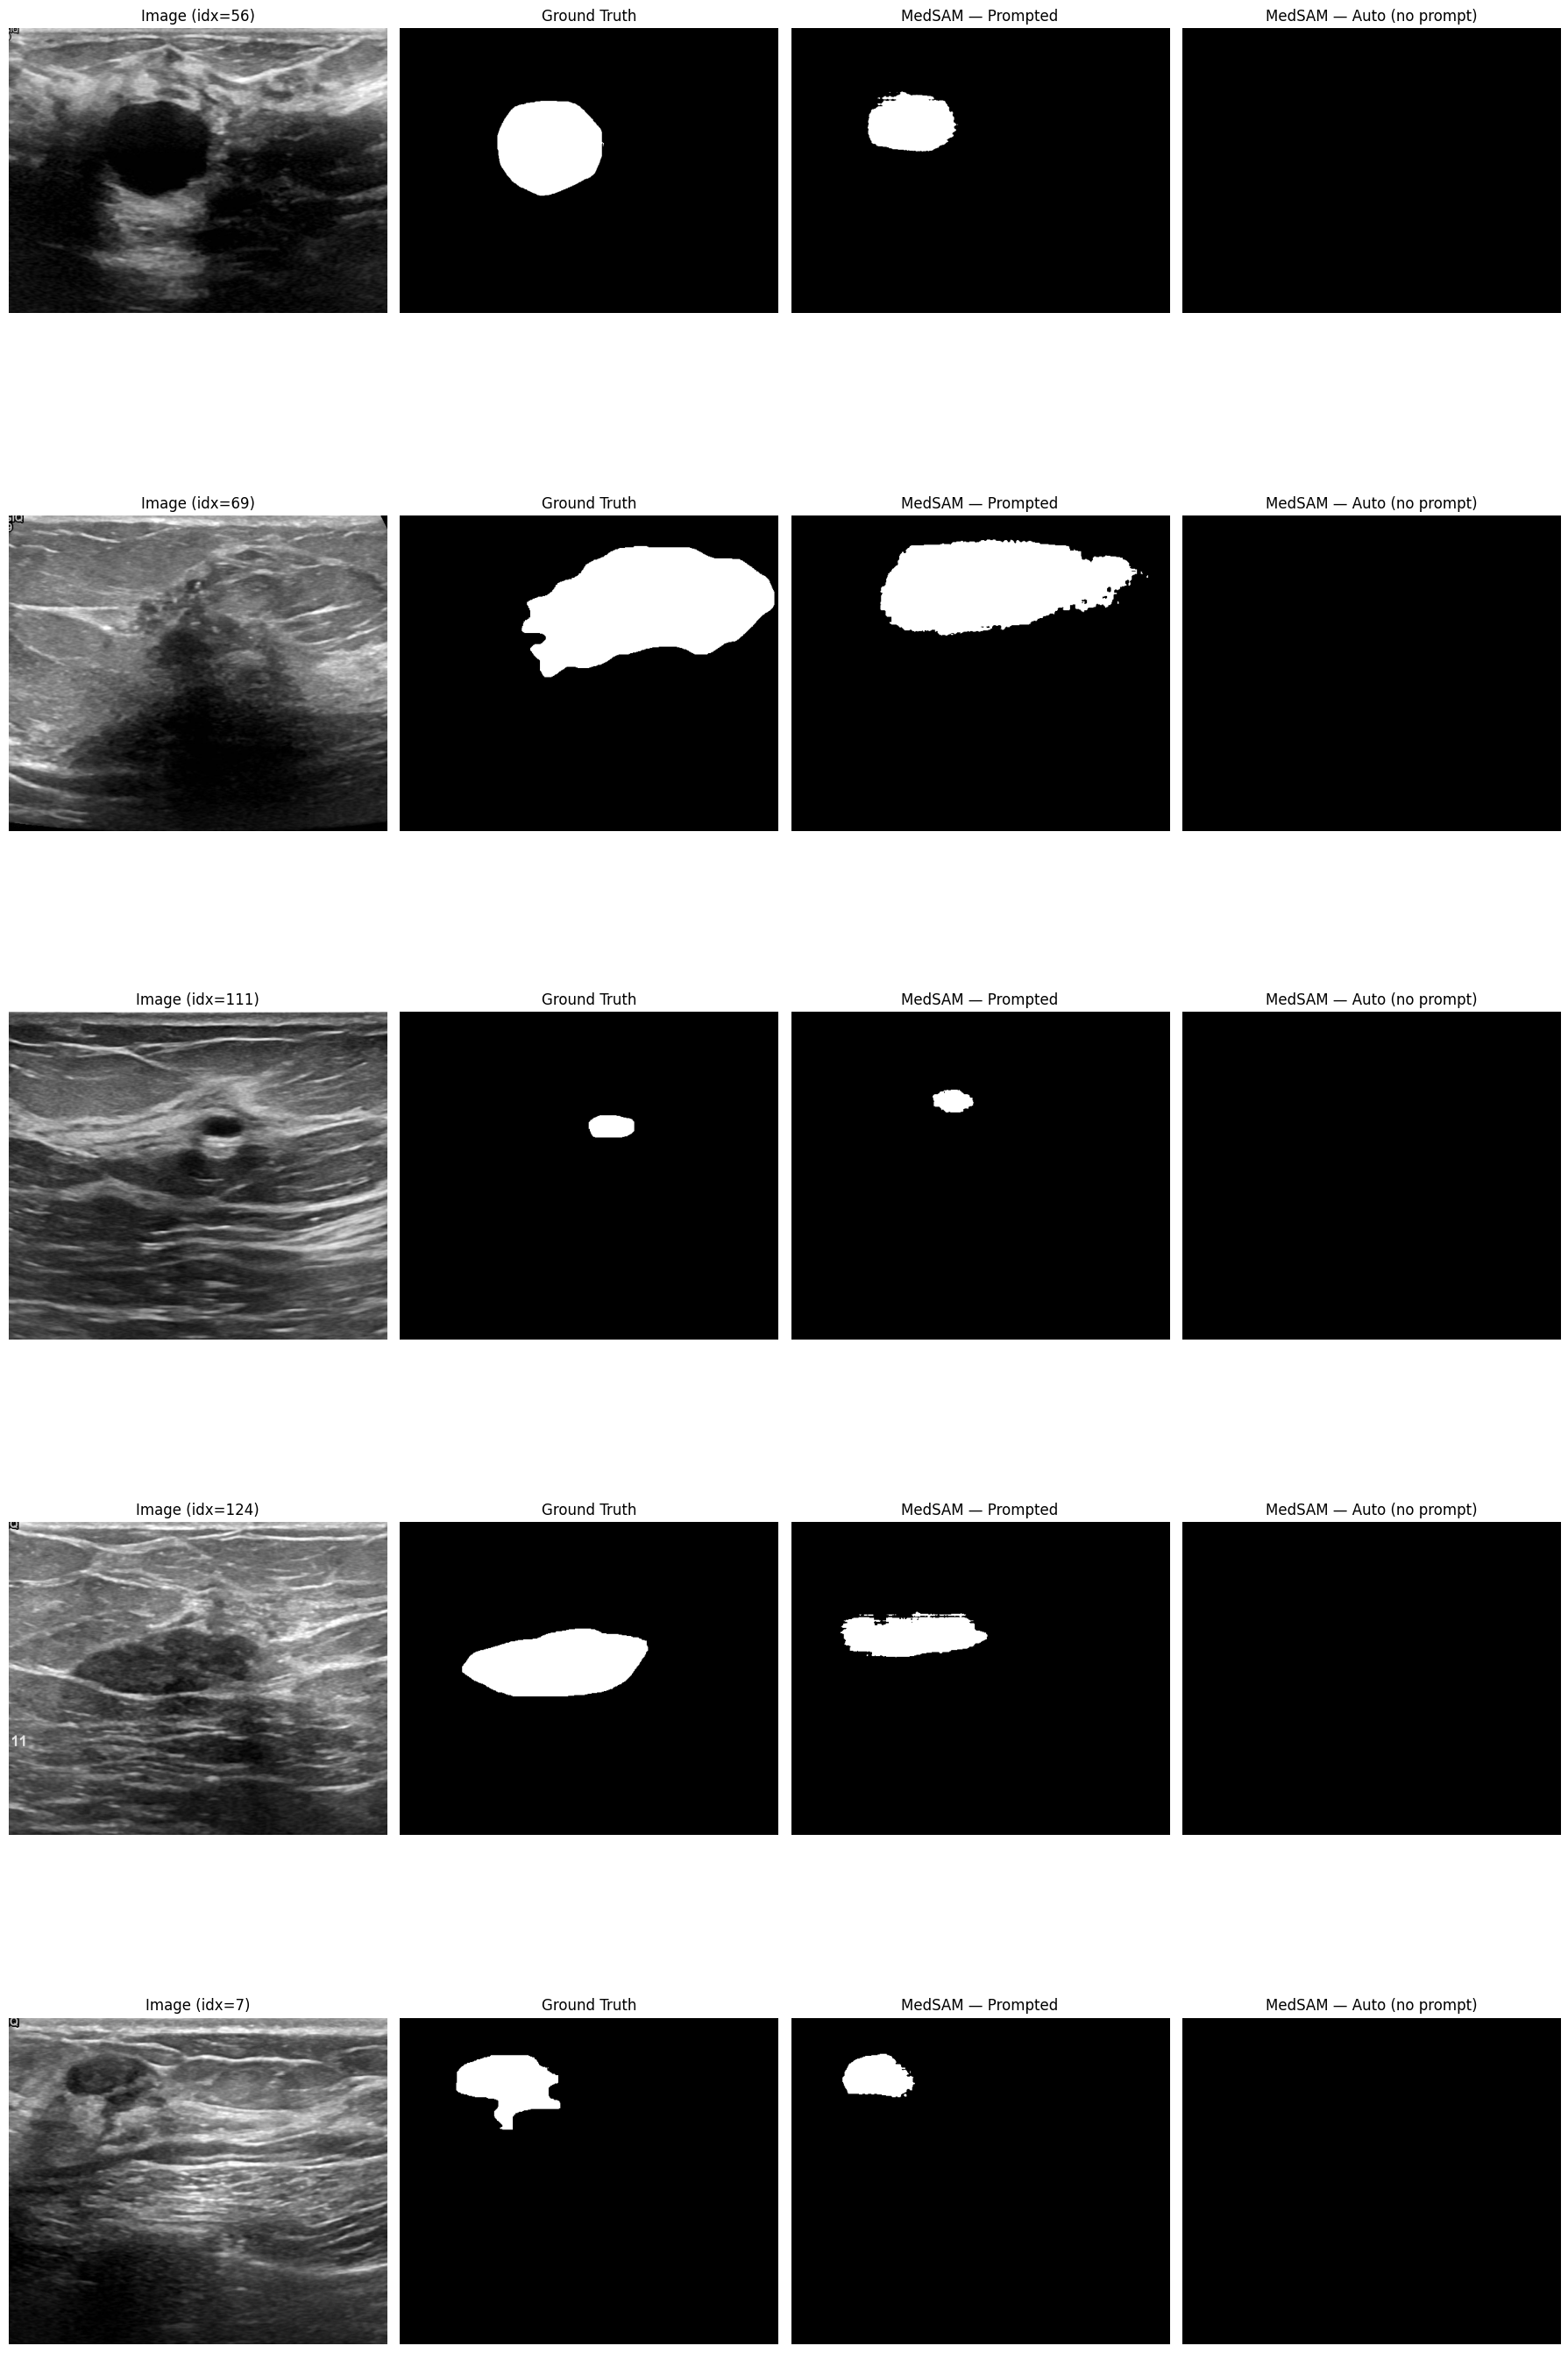

In [14]:
import os, cv2, numpy as np, pandas as pd, matplotlib.pyplot as plt, random

TEST_CSV   = "/kaggle/working/index_test.csv"
OUT_PROMPT = "/kaggle/working/preds_medsam_prompted"
OUT_AUTO   = "/kaggle/working/preds_medsam_auto"
N = 5
eps = 1e-6

def _prep(pred, gt):
    if pred.shape != gt.shape:
        pred = cv2.resize((pred>0).astype(np.uint8)*255, (gt.shape[1], gt.shape[0]),
                          interpolation=cv2.INTER_NEAREST)
    return (pred>0), (gt>0)

def dice(pr, gt):  pr,gt=_prep(pr,gt); inter=(pr & gt).sum(); return (2*inter)/(pr.sum()+gt.sum()+eps)
def iou(pr, gt):   pr,gt=_prep(pr,gt); inter=(pr & gt).sum(); uni=(pr | gt).sum(); return inter/(uni+eps)
def prec(pr, gt):  pr,gt=_prep(pr,gt); tp=(pr & gt).sum(); fp=(pr & ~gt).sum(); return tp/(tp+fp+eps)
def rec(pr, gt):   pr,gt=_prep(pr,gt); tp=(pr & gt).sum(); fn=(~pr & gt).sum(); return tp/(tp+fn+eps)
def acc(pr, gt):   pr,gt=_prep(pr,gt); return (pr==gt).sum()/(gt.size+eps)

df = pd.read_csv(TEST_CSV)
total = len(df)
indices = random.sample(range(total), k=min(N, total))
print("🎲 Selected indices:", indices)

plt.figure(figsize=(18, 6*len(indices)))
for r, idx in enumerate(indices):
    img = cv2.imread(df.iloc[idx]["image"], cv2.IMREAD_GRAYSCALE)
    gt  = cv2.imread(df.iloc[idx]["mask"],  cv2.IMREAD_GRAYSCALE)
    prP = cv2.imread(os.path.join(OUT_PROMPT, f"{idx:03d}.png"), cv2.IMREAD_GRAYSCALE)
    prA = cv2.imread(os.path.join(OUT_AUTO,   f"{idx:03d}.png"), cv2.IMREAD_GRAYSCALE)
    if img is None or gt is None or prP is None or prA is None: continue

    dP,iP,pP,rP,aP = dice(prP,gt), iou(prP,gt), prec(prP,gt), rec(prP,gt), acc(prP,gt)
    dA,iA,pA,rA,aA = dice(prA,gt), iou(prA,gt), prec(prA,gt), rec(prA,gt), acc(prA,gt)

    base = 4*r + 1
    plt.subplot(len(indices), 4, base)
    plt.imshow(img, cmap='gray'); plt.axis('off'); plt.title(f"Image (idx={idx})")

    plt.subplot(len(indices), 4, base+1)
    plt.imshow(gt, cmap='gray'); plt.axis('off'); plt.title("Ground Truth")

    plt.subplot(len(indices), 4, base+2)
    plt.imshow(prP, cmap='gray'); plt.axis('off'); plt.title("MedSAM — Prompted")
    plt.xlabel(f"Dice={dP:.3f}  IoU={iP:.3f}\nP={pP:.3f}  R={rP:.3f}  Acc={aP:.3f}")

    plt.subplot(len(indices), 4, base+3)
    plt.imshow(prA, cmap='gray'); plt.axis('off'); plt.title("MedSAM — Auto (no prompt)")
    plt.xlabel(f"Dice={dA:.3f}  IoU={iA:.3f}\nP={pA:.3f}  R={rA:.3f}  Acc={aA:.3f}")

plt.tight_layout(); plt.show()
